# Step 1: Load the Libraries

In [44]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import sklearn

# Loading Data Visualization libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')#to have a white background
%matplotlib inline

# Importing SCIKIT learn and Boston dataset

In [3]:
import sklearn as sk
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.data.shape)#gives the shape of the feature_names only (i.e. x- values)

(506, 13)


In [4]:
print(boston.DESCR) # to get the descirption of what is available in boston dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#it has 14 features but the price column is not there 
#in scikit learn the price column is stored in target attribute.

In [5]:
print(boston.target.shape)

(506,)


In [6]:
print(boston.feature_names)# gives out the columns of the data set.

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# Rooms vs Price using SciKit Learn


Text(0.5, 1.0, 'Rooms vs Price')

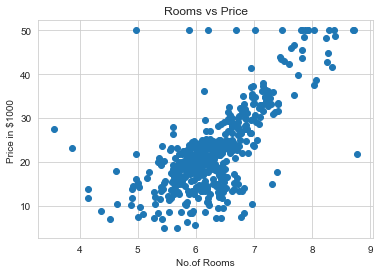

In [7]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('No.of Rooms')
plt.ylabel('Price in $1000 ')
plt.title('Rooms vs Price')

# Crime Vs Price

Text(0.5, 1.0, 'Crime vs Price')

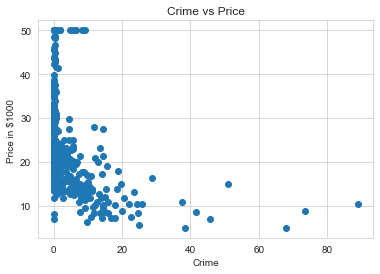

In [8]:
plt.scatter(boston.data[:,0],boston.target)
plt.xlabel('Crime')
plt.ylabel('Price in $1000 ')
plt.title('Crime vs Price')

# Loading the data of boston to a dataframe

In [9]:
boston_df=pd.DataFrame(boston.data)

In [10]:
boston_df.head()#as noticed the column names are there in another attribute called "feature_names"

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df.columns=boston.feature_names

In [12]:
boston_df['Price']=boston.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


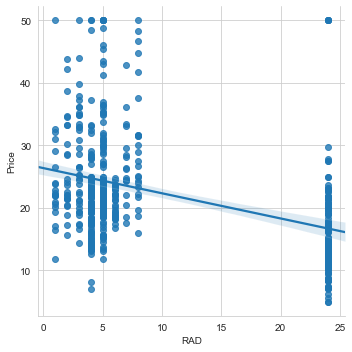

In [14]:
sns.lmplot('RAD','Price',data=boston_df) #the houses which are closer to the roads are having a higher price.

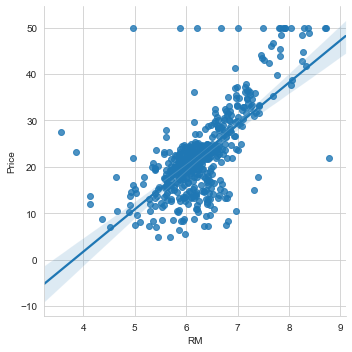

In [15]:
sns.lmplot('RM','Price',data=boston_df) 

# Gradient Descent Algorithm
# Predicting the price of a house using one variable i.e. Rooms

As shown above, we are going to manually code the lm plot

# X-Array

In [16]:
X=np.vstack(boston_df.RM)

In [17]:
X.shape

(506, 1)

In [18]:
#converting "X" into [X,1] array
X[:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

# Y-values in vector

In [19]:
Y=boston_df.Price
Y=np.vstack(Y) #Y should be of vector
Y.shape

(506, 1)

# Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)



In [21]:
x_train.shape

(339, 1)

In [22]:
x_test.shape


(167, 1)

In [23]:

y_train.shape


(339, 1)

In [24]:

y_test.shape

(167, 1)

# Implementation of Gradient Descent Algorithm

In [32]:
#creating delta functions for theta0 and theta1
def delta_theta(t0,t1,alpha,X,Y):
    '''
    computing the sum of (theta0+theta1*x)-y
    '''
    theta0=t0 #copying theta 0 value
    theta1=t1 #copying theta 1 value
    alpha=alpha #copying alpha value #learning rate
    x=X      #copying X vector
    y=Y      #copying Y vector
    
    m=len(x)   #length of x vector or y vector
    
    t_t0=0.0   #temp theta0 values
    t_t1=0.0   #temp theta1
    
    delta_theta0=0.0 #sum of (theta0+theta1*x)-y
    delta_theta1=0.0 # sum of ((theta0+theta1*x)-y)*x[i]
    
    for i in range(0,m): #running the loop from 0 to m elements
        delta_theta0+=((theta0+theta1*x[i])-y[i]) #calculation of theta0 
        delta_theta1+=((theta0+theta1*x[i])-y[i])*x[i]#calculation of theta 1 for all the data
    t_t0,t_t1=(theta0-(alpha/m)*delta_theta0),(theta1-(alpha/m)*delta_theta1) #simulatneous assignment of t0 &t1 values
    return t_t0,t_t1

        

In [33]:
def distance(t0,t1,x,y):
    theta0=t0
    theta1=t1
    X=x
    Y=y
    m= len(X)
    dist=0.0
    h_theta=0.0 #predicted value
    for i in range(0,m): #running till the entire dataset
        h_theta=theta0+theta1*x[i] #general linear equation
        dist+=(h_theta-y[i])**2 #squaring the distances between all the predicted and expected outputs
    return dist

In [34]:
def J_theta(t0,t1,alpha,X,Y,ite):
    '''
    finding the J(theta) value based on theta0 & theta1
    storing these values are useful in knowing the working of gradient descent algorithm.
    '''
    #initialising random values for theta0 and theta1 from users.
    t0=t0
    t1=t1
    alpha=alpha
    x=X #copying input vectors
    y=Y #copying output vector
    ite=ite # no. of times the gradient descent algorithm should run
    J_theta=[]
    m=len(x) #getting the no. of samples
    for i in range(0,ite):
        Jtheta=np.multiply((1/2*m),distance(t0,t1,x,y)) #(1/2*m)*distance(t0,t1,x,y)#cost fucntion
        J_theta.append(Jtheta)
        plt.scatter(i,J_theta[i])#plt.contourf([i,J_theta[i]]) #plt.plot(i,J_theta[i]) 
        print('slope: {},constant: {},cost: {},iteration: {}'.format(t1,t0,J_theta[i],i))
        t0,t1=delta_theta(t0,t1,alpha,x,y) # finding the new values of thetas
        

In [ ]:
print('Welcome to Gradient Descent Algorithm')
print('Input the values of Theta0 and Theta1 for the algorithm to progress')
print('Enter theta0 value:')
theta0=float(input())
print('Enter theta1 value:')
theta1=float(input())
print('Enter the Alpha Value or Learning rate:')
alpha=float(input())
print('Enter the no. of iterations:')
ite=int(input())
X=x_train
Y=y_train
J_theta(theta0,theta1,alpha,X,Y,ite)
        

Welcome to Gradient Descent Algorithm
Input the values of Theta0 and Theta1 for the algorithm to progress
Enter theta0 value:
-1
Enter theta1 value:
1
Enter the Alpha Value or Learning rate:
0.00001
Enter the no. of iterations:
10000
slope: 1.0,constant: -1.0,cost: [22443589.46251952],iteration: 0
slope: [1.00115799],constant: [-0.99982357],cost: [22427824.65198119],iteration: 1
slope: [1.00231551],constant: [-0.99964721],cost: [22412072.93610397],iteration: 2
slope: [1.00347254],constant: [-0.99947092],cost: [22396334.30401095],iteration: 3
slope: [1.00462909],constant: [-0.99929471],cost: [22380608.74483424],iteration: 4
slope: [1.00578517],constant: [-0.99911858],cost: [22364896.24771502],iteration: 5
slope: [1.00694076],constant: [-0.99894252],cost: [22349196.80180341],iteration: 6
slope: [1.00809587],constant: [-0.99876653],cost: [22333510.39625866],iteration: 7
slope: [1.00925051],constant: [-0.99859062],cost: [22317837.02024892],iteration: 8
slope: [1.01040466],constant: [-0.998

slope: [1.11900149],constant: [-0.98187826],cost: [20857784.69382352],iteration: 105
slope: [1.12011008],constant: [-0.98170954],cost: [20843337.09315623],iteration: 106
slope: [1.12121821],constant: [-0.98154088],cost: [20828901.49302695],iteration: 107
slope: [1.12232588],constant: [-0.9813723],cost: [20814477.88346755],iteration: 108
slope: [1.12343309],constant: [-0.9812038],cost: [20800066.25451825],iteration: 109
slope: [1.12453984],constant: [-0.98103536],cost: [20785666.5962275],iteration: 110
slope: [1.12564613],constant: [-0.98086699],cost: [20771278.89865205],iteration: 111
slope: [1.12675196],constant: [-0.9806987],cost: [20756903.15185685],iteration: 112
slope: [1.12785733],constant: [-0.98053048],cost: [20742539.34591518],iteration: 113
slope: [1.12896224],constant: [-0.98036233],cost: [20728187.47090852],iteration: 114
slope: [1.1300667],constant: [-0.98019425],cost: [20713847.51692654],iteration: 115
slope: [1.13117069],constant: [-0.98002624],cost: [20699519.47406726],

slope: [1.23292591],constant: [-0.96454892],cost: [19404479.86775642],iteration: 210
slope: [1.2339872],constant: [-0.96438757],cost: [19391239.41762014],iteration: 211
slope: [1.23504806],constant: [-0.9642263],cost: [19378009.96531806],iteration: 212
slope: [1.23610847],constant: [-0.9640651],cost: [19364791.50171504],iteration: 213
slope: [1.23716844],constant: [-0.96390396],cost: [19351584.01768341],iteration: 214
slope: [1.23822797],constant: [-0.96374289],cost: [19338387.50410315],iteration: 215
slope: [1.23928706],constant: [-0.96358189],cost: [19325201.9518618],iteration: 216
slope: [1.24034572],constant: [-0.96342096],cost: [19312027.35185442],iteration: 217
slope: [1.24140393],constant: [-0.9632601],cost: [19298863.69498379],iteration: 218
slope: [1.2424617],constant: [-0.96309931],cost: [19285710.97216005],iteration: 219
slope: [1.24351904],constant: [-0.96293858],cost: [19272569.17430098],iteration: 220
slope: [1.24457593],constant: [-0.96277793],cost: [19259438.29233193],i

slope: [1.34503677],constant: [-0.94751551],cost: [18036231.70428356],iteration: 318
slope: [1.34605152],constant: [-0.94736143],cost: [18024127.75296059],iteration: 319
slope: [1.34706585],constant: [-0.94720742],cost: [18012033.85545398],iteration: 320
slope: [1.34807976],constant: [-0.94705347],cost: [17999950.00341271],iteration: 321
slope: [1.34909325],constant: [-0.94689959],cost: [17987876.1884926],iteration: 322
slope: [1.35010631],constant: [-0.94674578],cost: [17975812.40235653],iteration: 323
slope: [1.35111896],constant: [-0.94659203],cost: [17963758.63667411],iteration: 324
slope: [1.35213119],constant: [-0.94643834],cost: [17951714.88312207],iteration: 325
slope: [1.35314299],constant: [-0.94628472],cost: [17939681.13338394],iteration: 326
slope: [1.35415438],constant: [-0.94613117],cost: [17927657.37915016],iteration: 327
slope: [1.35516535],constant: [-0.94597768],cost: [17915643.61211811],iteration: 328
slope: [1.35617589],constant: [-0.94582426],cost: [17903639.823992

slope: [1.44640121],constant: [-0.93213355],cost: [16852011.0032427],iteration: 420
slope: [1.44737388],constant: [-0.93198604],cost: [16840890.69176676],iteration: 421
slope: [1.44834615],constant: [-0.93183859],cost: [16829779.61705966],iteration: 422
slope: [1.44931801],constant: [-0.9316912],cost: [16818677.77144903],iteration: 423
slope: [1.45028947],constant: [-0.93154388],cost: [16807585.14726885],iteration: 424
slope: [1.45126053],constant: [-0.93139662],cost: [16796501.73685937],iteration: 425
slope: [1.45223118],constant: [-0.93124943],cost: [16785427.53256741],iteration: 426
slope: [1.45320143],constant: [-0.9311023],cost: [16774362.52674594],iteration: 427
slope: [1.45417128],constant: [-0.93095522],cost: [16763306.71175443],iteration: 428
slope: [1.45514073],constant: [-0.93080822],cost: [16752260.07995859],iteration: 429
slope: [1.45610977],constant: [-0.93066127],cost: [16741222.62373055],iteration: 430
slope: [1.45707841],constant: [-0.93051439],cost: [16730194.33544874

slope: [1.54449467],constant: [-0.91726639],cost: [15753810.515723],iteration: 523
slope: [1.54542663],constant: [-0.91712524],cost: [15743602.39235966],iteration: 524
slope: [1.54635819],constant: [-0.91698414],cost: [15733402.74806811],iteration: 525
slope: [1.54728937],constant: [-0.91684311],cost: [15723211.57580526],iteration: 526
slope: [1.54822016],constant: [-0.91670213],cost: [15713028.86853397],iteration: 527
slope: [1.54915056],constant: [-0.91656122],cost: [15702854.61922291],iteration: 528
slope: [1.55008058],constant: [-0.91642037],cost: [15692688.82084655],iteration: 529
slope: [1.55101021],constant: [-0.91627957],cost: [15682531.46638525],iteration: 530
slope: [1.55193946],constant: [-0.91613884],cost: [15672382.5488252],iteration: 531
slope: [1.55286832],constant: [-0.91599817],cost: [15662242.06115837],iteration: 532
slope: [1.5537968],constant: [-0.91585755],cost: [15652109.99638259],iteration: 533
slope: [1.55472489],constant: [-0.915717],cost: [15641986.34750151],i

slope: [1.63401131],constant: [-0.90371636],cost: [14792665.04428597],iteration: 621
slope: [1.63490611],constant: [-0.90358101],cost: [14783255.26694364],iteration: 622
slope: [1.63580053],constant: [-0.90344571],cost: [14773853.30553742],iteration: 623
slope: [1.63669458],constant: [-0.90331047],cost: [14764459.1535751],iteration: 624
slope: [1.63758825],constant: [-0.90317529],cost: [14755072.80456988],iteration: 625
slope: [1.63848156],constant: [-0.90304016],cost: [14745694.25204032],iteration: 626
slope: [1.6393745],constant: [-0.9029051],cost: [14736323.48951037],iteration: 627
slope: [1.64026706],constant: [-0.90277009],cost: [14726960.51050939],iteration: 628
slope: [1.64115926],constant: [-0.90263514],cost: [14717605.30857209],iteration: 629
slope: [1.64205108],constant: [-0.90250025],cost: [14708257.87723854],iteration: 630
slope: [1.64294254],constant: [-0.90236541],cost: [14698918.2100542],iteration: 631
slope: [1.64383362],constant: [-0.90223063],cost: [14689586.3005699],

slope: [1.72425079],constant: [-0.89007501],cost: [13863390.39305449],iteration: 724
slope: [1.72510812],constant: [-0.8899455],cost: [13854752.48779408],iteration: 725
slope: [1.7259651],constant: [-0.88981604],cost: [13846121.75732435],iteration: 726
slope: [1.72682172],constant: [-0.88968664],cost: [13837498.19568566],iteration: 727
slope: [1.72767799],constant: [-0.8895573],cost: [13828881.7969233],iteration: 728
slope: [1.7285339],constant: [-0.88942801],cost: [13820272.55508754],iteration: 729
slope: [1.72938946],constant: [-0.88929878],cost: [13811670.46423357],iteration: 730
slope: [1.73024466],constant: [-0.8891696],cost: [13803075.51842149],iteration: 731
slope: [1.7310995],constant: [-0.88904048],cost: [13794487.71171641],iteration: 732
slope: [1.731954],constant: [-0.88891141],cost: [13785907.03818831],iteration: 733
slope: [1.73280813],constant: [-0.8887824],cost: [13777333.49191207],iteration: 734
slope: [1.73366191],constant: [-0.88865345],cost: [13768767.06696761],itera

slope: [1.80906879],constant: [-0.8772712],cost: [13026221.37001907],iteration: 825
slope: [1.80989092],constant: [-0.87714718],cost: [13018278.83085249],iteration: 826
slope: [1.8107127],constant: [-0.87702322],cost: [13010342.88887987],iteration: 827
slope: [1.81153415],constant: [-0.87689931],cost: [13002413.53862132],iteration: 828
slope: [1.81235525],constant: [-0.87677546],cost: [12994490.77460155],iteration: 829
slope: [1.81317602],constant: [-0.87665165],cost: [12986574.59134975],iteration: 830
slope: [1.81399644],constant: [-0.8765279],cost: [12978664.98339971],iteration: 831
slope: [1.81481652],constant: [-0.87640421],cost: [12970761.94528975],iteration: 832
slope: [1.81563627],constant: [-0.87628057],cost: [12962865.47156271],iteration: 833
slope: [1.81645567],constant: [-0.87615698],cost: [12954975.55676597],iteration: 834
slope: [1.81727473],constant: [-0.87603344],cost: [12947092.19545145],iteration: 835
slope: [1.81809345],constant: [-0.87590996],cost: [12939215.38217558

slope: [1.88803674],constant: [-0.86536753],cost: [12278391.71668332],iteration: 923
slope: [1.88882609],constant: [-0.86524863],cost: [12271070.33555089],iteration: 924
slope: [1.88961511],constant: [-0.86512978],cost: [12263755.03565566],iteration: 925
slope: [1.89040381],constant: [-0.86501099],cost: [12256445.8119463],iteration: 926
slope: [1.89119217],constant: [-0.86489224],cost: [12249142.65937571],iteration: 927
slope: [1.89198022],constant: [-0.86477355],cost: [12241845.572901],iteration: 928
slope: [1.89276793],constant: [-0.8646549],cost: [12234554.54748345],iteration: 929
slope: [1.89355532],constant: [-0.86453631],cost: [12227269.57808847],iteration: 930
slope: [1.89434238],constant: [-0.86441777],cost: [12219990.65968575],iteration: 931
slope: [1.89512911],constant: [-0.86429928],cost: [12212717.78724911],iteration: 932
slope: [1.89591552],constant: [-0.86418084],cost: [12205450.95575653],iteration: 933
slope: [1.8967016],constant: [-0.86406245],cost: [12198190.16019019],

slope: [1.9630982],constant: [-0.85406926],cost: [11595801.53948174],iteration: 1020
slope: [1.9638564],constant: [-0.85395523],cost: [11589047.12624031],iteration: 1021
slope: [1.96461428],constant: [-0.85384124],cost: [11582298.32329162],iteration: 1022
slope: [1.96537185],constant: [-0.8537273],cost: [11575555.12597555],iteration: 1023
slope: [1.9661291],constant: [-0.85361341],cost: [11568817.52963587],iteration: 1024
slope: [1.96688604],constant: [-0.85349957],cost: [11562085.52962017],iteration: 1025
slope: [1.96764266],constant: [-0.85338578],cost: [11555359.12127997],iteration: 1026
slope: [1.96839897],constant: [-0.85327204],cost: [11548638.29997059],iteration: 1027
slope: [1.96915497],constant: [-0.85315834],cost: [11541923.06105126],iteration: 1028
slope: [1.96991065],constant: [-0.8530447],cost: [11535213.39988504],iteration: 1029
slope: [1.97066602],constant: [-0.8529311],cost: [11528509.31183881],iteration: 1030
slope: [1.97142108],constant: [-0.85281755],cost: [11521810.

slope: [2.03956226],constant: [-0.84257787],cost: [10928760.53364255],iteration: 1123
slope: [2.04028872],constant: [-0.84246879],cost: [10922560.17154468],iteration: 1124
slope: [2.04101488],constant: [-0.84235975],cost: [10916364.95952423],iteration: 1125
slope: [2.04174074],constant: [-0.84225076],cost: [10910174.89330336],iteration: 1126
slope: [2.04246629],constant: [-0.84214182],cost: [10903989.96860777],iteration: 1127
slope: [2.04319155],constant: [-0.84203292],cost: [10897810.18116673],iteration: 1128
slope: [2.0439165],constant: [-0.84192407],cost: [10891635.52671304],iteration: 1129
slope: [2.04464116],constant: [-0.84181527],cost: [10885466.00098306],iteration: 1130
slope: [2.04536551],constant: [-0.84170651],cost: [10879301.59971668],iteration: 1131
slope: [2.04608956],constant: [-0.84159781],cost: [10873142.31865734],iteration: 1132
slope: [2.04681331],constant: [-0.84148915],cost: [10866988.15355198],iteration: 1133
slope: [2.04753677],constant: [-0.84138053],cost: [1086

slope: [2.11073595],constant: [-0.83189927],cost: [10333539.19378709],iteration: 1223
slope: [2.11143287],constant: [-0.83179479],cost: [10327833.22728532],iteration: 1224
slope: [2.1121295],constant: [-0.83169037],cost: [10322132.00019776],iteration: 1225
slope: [2.11282585],constant: [-0.83158598],cost: [10316435.50858769],iteration: 1226
slope: [2.1135219],constant: [-0.83148164],cost: [10310743.74852161],iteration: 1227
slope: [2.11421767],constant: [-0.83137735],cost: [10305056.71606935],iteration: 1228
slope: [2.11491315],constant: [-0.8312731],cost: [10299374.40730398],iteration: 1229
slope: [2.11560833],constant: [-0.8311689],cost: [10293696.81830182],iteration: 1230
slope: [2.11630323],constant: [-0.83106474],cost: [10288023.94514249],iteration: 1231
slope: [2.11699785],constant: [-0.83096063],cost: [10282355.7839088],iteration: 1232
slope: [2.11769217],constant: [-0.83085656],cost: [10276692.33068688],iteration: 1233
slope: [2.1183862],constant: [-0.83075254],cost: [10271033.

slope: [2.18102062],constant: [-0.82137231],cost: [9770038.79485619],iteration: 1326
slope: [2.18168837],constant: [-0.82127239],cost: [9764800.87485099],iteration: 1327
slope: [2.18235585],constant: [-0.82117251],cost: [9759567.3054833],iteration: 1328
slope: [2.18302305],constant: [-0.82107267],cost: [9754338.08313934],iteration: 1329
slope: [2.18368997],constant: [-0.82097288],cost: [9749113.2042083],iteration: 1330
slope: [2.18435661],constant: [-0.82087313],cost: [9743892.66508241],iteration: 1331
slope: [2.18502298],constant: [-0.82077343],cost: [9738676.46215682],iteration: 1332
slope: [2.18568908],constant: [-0.82067376],cost: [9733464.59182977],iteration: 1333
slope: [2.18635489],constant: [-0.82057415],cost: [9728257.0505024],iteration: 1334
slope: [2.18702043],constant: [-0.82047457],cost: [9723053.83457891],iteration: 1335
slope: [2.1876857],constant: [-0.82037504],cost: [9717854.94046645],iteration: 1336
slope: [2.18835068],constant: [-0.82027555],cost: [9712660.36457518],

slope: [2.2458018],constant: [-0.8116871],cost: [9272033.95975256],iteration: 1425
slope: [2.24644267],constant: [-0.81159138],cost: [9267209.68390107],iteration: 1426
slope: [2.24708328],constant: [-0.81149569],cost: [9262389.415099],iteration: 1427
slope: [2.24772362],constant: [-0.81140005],cost: [9257573.15001799],iteration: 1428
slope: [2.24836369],constant: [-0.81130445],cost: [9252760.88533235],iteration: 1429
slope: [2.2490035],constant: [-0.81120889],cost: [9247952.61771924],iteration: 1430
slope: [2.24964304],constant: [-0.81111337],cost: [9243148.34385851],iteration: 1431
slope: [2.25028231],constant: [-0.81101789],cost: [9238348.06043284],iteration: 1432
slope: [2.25092132],constant: [-0.81092246],cost: [9233551.76412761],iteration: 1433
slope: [2.25156007],constant: [-0.81082706],cost: [9228759.45163096],iteration: 1434
slope: [2.25219855],constant: [-0.81073171],cost: [9223971.11963382],iteration: 1435
slope: [2.25283677],constant: [-0.8106364],cost: [9219186.76482981],it

slope: [2.315339],constant: [-0.80131117],cost: [8760280.35501858],iteration: 1536
slope: [2.31595101],constant: [-0.80121995],cost: [8755881.14149179],iteration: 1537
slope: [2.31656277],constant: [-0.80112877],cost: [8751485.58194197],iteration: 1538
slope: [2.31717428],constant: [-0.80103762],cost: [8747093.67333402],iteration: 1539
slope: [2.31778553],constant: [-0.80094652],cost: [8742705.41263531],iteration: 1540
slope: [2.31839653],constant: [-0.80085546],cost: [8738320.79681579],iteration: 1541
slope: [2.31900728],constant: [-0.80076443],cost: [8733939.82284785],iteration: 1542
slope: [2.31961777],constant: [-0.80067345],cost: [8729562.48770646],iteration: 1543
slope: [2.32022801],constant: [-0.8005825],cost: [8725188.78836907],iteration: 1544
slope: [2.32083799],constant: [-0.8004916],cost: [8720818.72181564],iteration: 1545
slope: [2.32144772],constant: [-0.80040073],cost: [8716452.28502864],iteration: 1546
slope: [2.3220572],constant: [-0.80030991],cost: [8712089.47499307],i

slope: [2.37999044],constant: [-0.79168488],cost: [8305671.61418969],iteration: 1644
slope: [2.38057563],constant: [-0.79159785],cost: [8301649.99687213],iteration: 1645
slope: [2.38116057],constant: [-0.79151085],cost: [8297631.71988623],iteration: 1646
slope: [2.38174527],constant: [-0.79142389],cost: [8293616.78045737],iteration: 1647
slope: [2.38232973],constant: [-0.79133697],cost: [8289605.17581326],iteration: 1648
slope: [2.38291395],constant: [-0.79125009],cost: [8285596.90318392],iteration: 1649
slope: [2.38349792],constant: [-0.79116324],cost: [8281591.95980165],iteration: 1650
slope: [2.38408166],constant: [-0.79107643],cost: [8277590.34290104],iteration: 1651
slope: [2.38466514],constant: [-0.79098966],cost: [8273592.04971899],iteration: 1652
slope: [2.38524839],constant: [-0.79090293],cost: [8269597.07749472],iteration: 1653
slope: [2.3858314],constant: [-0.79081623],cost: [8265605.4234697],iteration: 1654
slope: [2.38641416],constant: [-0.79072958],cost: [8261617.08488771

slope: [2.44068824],constant: [-0.78266705],cost: [7897445.10548506],iteration: 1750
slope: [2.44124824],constant: [-0.78258395],cost: [7893762.55792822],iteration: 1751
slope: [2.44180801],constant: [-0.78250088],cost: [7890083.06905919],iteration: 1752
slope: [2.44236755],constant: [-0.78241785],cost: [7886406.63633732],iteration: 1753
slope: [2.44292685],constant: [-0.78233485],cost: [7882733.25722404],iteration: 1754
slope: [2.44348592],constant: [-0.78225189],cost: [7879062.92918291],iteration: 1755
slope: [2.44404477],constant: [-0.78216897],cost: [7875395.64967962],iteration: 1756
slope: [2.44460337],constant: [-0.78208608],cost: [7871731.41618191],iteration: 1757
slope: [2.44516175],constant: [-0.78200323],cost: [7868070.22615969],iteration: 1758
slope: [2.4457199],constant: [-0.78192042],cost: [7864412.0770849],iteration: 1759
slope: [2.44627781],constant: [-0.78183764],cost: [7860756.96643166],iteration: 1760
slope: [2.44683549],constant: [-0.7817549],cost: [7857104.8916761],

slope: [2.49823766],constant: [-0.7741363],cost: [7527011.69660253],iteration: 1855
slope: [2.49877378],constant: [-0.77405693],cost: [7523636.82663599],iteration: 1856
slope: [2.49930968],constant: [-0.77397758],cost: [7520264.75978889],iteration: 1857
slope: [2.49984536],constant: [-0.77389827],cost: [7516895.49373288],iteration: 1858
slope: [2.50038082],constant: [-0.773819],cost: [7513529.02614151],iteration: 1859
slope: [2.50091606],constant: [-0.77373976],cost: [7510165.35469026],iteration: 1860
slope: [2.50145107],constant: [-0.77366056],cost: [7506804.47705657],iteration: 1861
slope: [2.50198586],constant: [-0.77358139],cost: [7503446.39091978],iteration: 1862
slope: [2.50252043],constant: [-0.77350225],cost: [7500091.09396118],iteration: 1863
slope: [2.50305477],constant: [-0.77342315],cost: [7496738.58386397],iteration: 1864
slope: [2.5035889],constant: [-0.77334409],cost: [7493388.85831327],iteration: 1865
slope: [2.5041228],constant: [-0.77326506],cost: [7490041.91499615],i

slope: [2.55487247],constant: [-0.76576119],cost: [7178257.00093415],iteration: 1963
slope: [2.55538509],constant: [-0.76568548],cost: [7175171.80090328],iteration: 1964
slope: [2.55589751],constant: [-0.7656098],cost: [7172089.16338133],iteration: 1965
slope: [2.55640971],constant: [-0.76553415],cost: [7169009.08623979],iteration: 1966
slope: [2.5569217],constant: [-0.76545854],cost: [7165931.56735191],iteration: 1967
slope: [2.55743347],constant: [-0.76538297],cost: [7162856.60459271],iteration: 1968
slope: [2.55794504],constant: [-0.76530742],cost: [7159784.19583899],iteration: 1969
slope: [2.55845639],constant: [-0.76523191],cost: [7156714.33896928],iteration: 1970
slope: [2.55896753],constant: [-0.76515643],cost: [7153647.03186388],iteration: 1971
slope: [2.55947846],constant: [-0.76508099],cost: [7150582.2724049],iteration: 1972
slope: [2.55998918],constant: [-0.76500557],cost: [7147520.05847614],iteration: 1973
slope: [2.56049968],constant: [-0.76493019],cost: [7144460.3879632],

slope: [2.60804424],constant: [-0.75791796],cost: [6865084.16303488],iteration: 2069
slope: [2.60853481],constant: [-0.75784569],cost: [6862259.07768051],iteration: 2070
slope: [2.60902518],constant: [-0.75777345],cost: [6859436.33877423],iteration: 2071
slope: [2.60951534],constant: [-0.75770125],cost: [6856615.94436699],iteration: 2072
slope: [2.61000529],constant: [-0.75762908],cost: [6853797.89251134],iteration: 2073
slope: [2.61049505],constant: [-0.75755694],cost: [6850982.1812615],iteration: 2074
slope: [2.6109846],constant: [-0.75748483],cost: [6848168.80867327],iteration: 2075
slope: [2.61147395],constant: [-0.75741275],cost: [6845357.77280404],iteration: 2076
slope: [2.61196309],constant: [-0.7573407],cost: [6842549.07171289],iteration: 2077
slope: [2.61245204],constant: [-0.75726869],cost: [6839742.70346044],iteration: 2078
slope: [2.61294078],constant: [-0.75719671],cost: [6836938.66610897],iteration: 2079
slope: [2.61342931],constant: [-0.75712476],cost: [6834136.95772232]

slope: [2.65657782],constant: [-0.75077714],cost: [6591281.80142067],iteration: 2170
slope: [2.65704825],constant: [-0.75070802],cost: [6588684.12903341],iteration: 2171
slope: [2.65751849],constant: [-0.75063892],cost: [6586088.61419664],iteration: 2172
slope: [2.65798853],constant: [-0.75056986],cost: [6583495.25511821],iteration: 2173
slope: [2.65845838],constant: [-0.75050082],cost: [6580904.05000747],iteration: 2174
slope: [2.65892804],constant: [-0.75043182],cost: [6578314.99707527],iteration: 2175
slope: [2.6593975],constant: [-0.75036285],cost: [6575728.09453391],iteration: 2176
slope: [2.65986676],constant: [-0.7502939],cost: [6573143.3405972],iteration: 2177
slope: [2.66033583],constant: [-0.75022499],cost: [6570560.73348042],iteration: 2178
slope: [2.66080471],constant: [-0.75015611],cost: [6567980.27140038],iteration: 2179
slope: [2.66127339],constant: [-0.75008726],cost: [6565401.95257529],iteration: 2180
slope: [2.66174187],constant: [-0.75001843],cost: [6562825.77522493]

slope: [2.70447238],constant: [-0.74374894],cost: [6332360.09018555],iteration: 2274
slope: [2.70492295],constant: [-0.74368292],cost: [6329977.46983257],iteration: 2275
slope: [2.70537333],constant: [-0.74361692],cost: [6327596.82839993],iteration: 2276
slope: [2.70582352],constant: [-0.74355096],cost: [6325218.16424387],iteration: 2277
slope: [2.70627353],constant: [-0.74348502],cost: [6322841.47572197],iteration: 2278
slope: [2.70672335],constant: [-0.74341911],cost: [6320466.76119321],iteration: 2279
slope: [2.70717298],constant: [-0.74335323],cost: [6318094.01901792],iteration: 2280
slope: [2.70762243],constant: [-0.74328738],cost: [6315723.24755779],iteration: 2281
slope: [2.70807169],constant: [-0.74322156],cost: [6313354.44517586],iteration: 2282
slope: [2.70852076],constant: [-0.74315577],cost: [6310987.61023656],iteration: 2283
slope: [2.70896965],constant: [-0.74309001],cost: [6308622.74110564],iteration: 2284
slope: [2.70941835],constant: [-0.74302428],cost: [6306259.836150

slope: [2.74904863],constant: [-0.73722575],cost: [6101440.53498555],iteration: 2375
slope: [2.74948071],constant: [-0.73716261],cost: [6099249.70755955],iteration: 2376
slope: [2.7499126],constant: [-0.7370995],cost: [6097060.69974359],iteration: 2377
slope: [2.75034432],constant: [-0.73703642],cost: [6094873.51002626],iteration: 2378
slope: [2.75077586],constant: [-0.73697337],cost: [6092688.13689739],iteration: 2379
slope: [2.75120722],constant: [-0.73691034],cost: [6090504.57884801],iteration: 2380
slope: [2.7516384],constant: [-0.73684734],cost: [6088322.8343705],iteration: 2381
slope: [2.75206941],constant: [-0.73678437],cost: [6086142.90195841],iteration: 2382
slope: [2.75250023],constant: [-0.73672142],cost: [6083964.78010658],iteration: 2383
slope: [2.75293088],constant: [-0.73665851],cost: [6081788.46731109],iteration: 2384
slope: [2.75336134],constant: [-0.73659562],cost: [6079613.96206927],iteration: 2385
slope: [2.75379163],constant: [-0.73653276],cost: [6077441.26287971],

slope: [2.79138116],constant: [-0.73104845],cost: [5891125.30853462],iteration: 2475
slope: [2.79179568],constant: [-0.73098805],cost: [5889109.15949244],iteration: 2476
slope: [2.79221002],constant: [-0.73092768],cost: [5887094.68496601],iteration: 2477
slope: [2.7926242],constant: [-0.73086733],cost: [5885081.88356442],iteration: 2478
slope: [2.7930382],constant: [-0.73080701],cost: [5883070.75389791],iteration: 2479
slope: [2.79345204],constant: [-0.73074672],cost: [5881061.29457789],iteration: 2480
slope: [2.7938657],constant: [-0.73068646],cost: [5879053.50421688],iteration: 2481
slope: [2.79427918],constant: [-0.73062622],cost: [5877047.3814286],iteration: 2482
slope: [2.7946925],constant: [-0.73056601],cost: [5875042.9248279],iteration: 2483
slope: [2.79510565],constant: [-0.73050582],cost: [5873040.13303077],iteration: 2484
slope: [2.79551862],constant: [-0.73044567],cost: [5871039.00465439],iteration: 2485
slope: [2.79593143],constant: [-0.73038554],cost: [5869039.53831703],it

slope: [2.83079949],constant: [-0.72531308],cost: [5703154.26237603],iteration: 2572
slope: [2.83119766],constant: [-0.72525523],cost: [5701294.23233369],iteration: 2573
slope: [2.83159567],constant: [-0.72519741],cost: [5699435.74712891],iteration: 2574
slope: [2.83199351],constant: [-0.72513961],cost: [5697578.80547848],iteration: 2575
slope: [2.83239119],constant: [-0.72508184],cost: [5695723.40610029],iteration: 2576
slope: [2.8327887],constant: [-0.7250241],cost: [5693869.54771324],iteration: 2577
slope: [2.83318604],constant: [-0.72496638],cost: [5692017.22903736],iteration: 2578
slope: [2.83358323],constant: [-0.72490869],cost: [5690166.44879367],iteration: 2579
slope: [2.83398024],constant: [-0.72485102],cost: [5688317.20570434],iteration: 2580
slope: [2.83437709],constant: [-0.72479338],cost: [5686469.49849251],iteration: 2581
slope: [2.83477378],constant: [-0.72473576],cost: [5684623.32588244],iteration: 2582
slope: [2.8351703],constant: [-0.72467817],cost: [5682778.68659944]

slope: [2.87019219],constant: [-0.71959889],cost: [5522883.09531981],iteration: 2673
slope: [2.87057402],constant: [-0.71954359],cost: [5521172.78778602],iteration: 2674
slope: [2.8709557],constant: [-0.71948832],cost: [5519463.90072476],iteration: 2675
slope: [2.87133721],constant: [-0.71943307],cost: [5517756.43295612],iteration: 2676
slope: [2.87171857],constant: [-0.71937785],cost: [5516050.38330119],iteration: 2677
slope: [2.87209978],constant: [-0.71932265],cost: [5514345.75058204],iteration: 2678
slope: [2.87248082],constant: [-0.71926747],cost: [5512642.5336217],iteration: 2679
slope: [2.8728617],constant: [-0.71921232],cost: [5510940.73124419],iteration: 2680
slope: [2.87324243],constant: [-0.7191572],cost: [5509240.3422745],iteration: 2681
slope: [2.873623],constant: [-0.7191021],cost: [5507541.36553861],iteration: 2682
slope: [2.87400341],constant: [-0.71904702],cost: [5505843.79986347],iteration: 2683
slope: [2.87438367],constant: [-0.71899197],cost: [5504147.64407699],iter

slope: [2.90686928],constant: [-0.71429564],cost: [5361848.49101225],iteration: 2771
slope: [2.90723591],constant: [-0.71424272],cost: [5360271.92790478],iteration: 2772
slope: [2.90760238],constant: [-0.71418982],cost: [5358696.67417679],iteration: 2773
slope: [2.9079687],constant: [-0.71413694],cost: [5357122.72874067],iteration: 2774
slope: [2.90833487],constant: [-0.71408409],cost: [5355550.09050967],iteration: 2775
slope: [2.90870089],constant: [-0.71403126],cost: [5353978.75839799],iteration: 2776
slope: [2.90906675],constant: [-0.71397845],cost: [5352408.73132074],iteration: 2777
slope: [2.90943247],constant: [-0.71392567],cost: [5350840.00819388],iteration: 2778
slope: [2.90979803],constant: [-0.71387291],cost: [5349272.58793432],iteration: 2779
slope: [2.91016344],constant: [-0.71382018],cost: [5347706.46945986],iteration: 2780
slope: [2.9105287],constant: [-0.71376747],cost: [5346141.65168916],iteration: 2781
slope: [2.91089381],constant: [-0.71371478],cost: [5344578.13354183

slope: [2.94173334],constant: [-0.70927106],cost: [5214861.06433051],iteration: 2868
slope: [2.94208551],constant: [-0.70922039],cost: [5213406.57771783],iteration: 2869
slope: [2.94243753],constant: [-0.70916974],cost: [5211953.29908338],iteration: 2870
slope: [2.94278941],constant: [-0.70911912],cost: [5210501.22742378],iteration: 2871
slope: [2.94314114],constant: [-0.70906852],cost: [5209050.36173646],iteration: 2872
slope: [2.94349273],constant: [-0.70901795],cost: [5207600.70101971],iteration: 2873
slope: [2.94384417],constant: [-0.70896739],cost: [5206152.24427262],iteration: 2874
slope: [2.94419546],constant: [-0.70891686],cost: [5204704.99049515],iteration: 2875
slope: [2.94454661],constant: [-0.70886635],cost: [5203258.93868805],iteration: 2876
slope: [2.94489761],constant: [-0.70881587],cost: [5201814.08785293],iteration: 2877
slope: [2.94524847],constant: [-0.7087654],cost: [5200370.43699221],iteration: 2878
slope: [2.94559918],constant: [-0.70871496],cost: [5198927.9851091

slope: [2.97623716],constant: [-0.70431558],cost: [5075232.86368501],iteration: 2968
slope: [2.97657503],constant: [-0.70426715],cost: [5073894.34020688],iteration: 2969
slope: [2.97691275],constant: [-0.70421874],cost: [5072556.92838373],iteration: 2970
slope: [2.97725033],constant: [-0.70417034],cost: [5071220.62729217],iteration: 2971
slope: [2.97758778],constant: [-0.70412197],cost: [5069885.43600961],iteration: 2972
slope: [2.97792508],constant: [-0.70407363],cost: [5068551.35361417],iteration: 2973
slope: [2.97826224],constant: [-0.7040253],cost: [5067218.3791848],iteration: 2974
slope: [2.97859927],constant: [-0.703977],cost: [5065886.51180117],iteration: 2975
slope: [2.97893615],constant: [-0.70392872],cost: [5064555.75054372],iteration: 2976
slope: [2.9792729],constant: [-0.70388046],cost: [5063226.09449367],iteration: 2977
slope: [2.9796095],constant: [-0.70383222],cost: [5061897.54273299],iteration: 2978
slope: [2.97994597],constant: [-0.703784],cost: [5060570.09434442],iter

slope: [3.01128224],constant: [-0.69930141],cost: [4939361.34272703],iteration: 3074
slope: [3.01160558],constant: [-0.69925524],cost: [4938135.66091517],iteration: 3075
slope: [3.01192878],constant: [-0.6992091],cost: [4936910.99702784],iteration: 3076
slope: [3.01225185],constant: [-0.69916297],cost: [4935687.35021952],iteration: 3077
slope: [3.01257478],constant: [-0.69911686],cost: [4934464.71964539],iteration: 3078
slope: [3.01289758],constant: [-0.69907078],cost: [4933243.10446132],iteration: 3079
slope: [3.01322024],constant: [-0.69902472],cost: [4932022.50382391],iteration: 3080
slope: [3.01354277],constant: [-0.69897868],cost: [4930802.91689042],iteration: 3081
slope: [3.01386517],constant: [-0.69893266],cost: [4929584.34281883],iteration: 3082
slope: [3.01418743],constant: [-0.69888665],cost: [4928366.78076783],iteration: 3083
slope: [3.01450956],constant: [-0.69884068],cost: [4927150.22989679],iteration: 3084
slope: [3.01483156],constant: [-0.69879472],cost: [4925934.6893658

slope: [3.04234028],constant: [-0.69487513],cost: [4823956.61730201],iteration: 3172
slope: [3.04265074],constant: [-0.69483097],cost: [4822826.77805738],iteration: 3173
slope: [3.04296107],constant: [-0.69478683],cost: [4821697.87712694],iteration: 3174
slope: [3.04327127],constant: [-0.69474272],cost: [4820569.91373125],iteration: 3175
slope: [3.04358134],constant: [-0.69469862],cost: [4819442.88709159],iteration: 3176
slope: [3.04389129],constant: [-0.69465454],cost: [4818316.79642984],iteration: 3177
slope: [3.04420111],constant: [-0.69461048],cost: [4817191.64096855],iteration: 3178
slope: [3.04451079],constant: [-0.69456645],cost: [4816067.4199309],iteration: 3179
slope: [3.04482035],constant: [-0.69452243],cost: [4814944.13254074],iteration: 3180
slope: [3.04512978],constant: [-0.69447843],cost: [4813821.77802253],iteration: 3181
slope: [3.04543909],constant: [-0.69443445],cost: [4812700.3556014],iteration: 3182
slope: [3.04574826],constant: [-0.6943905],cost: [4811579.86450312]

slope: [3.0733533],constant: [-0.69047306],cost: [4713415.15490901],iteration: 3274
slope: [3.0736509],constant: [-0.69043091],cost: [4712377.11793841],iteration: 3275
slope: [3.07394839],constant: [-0.69038877],cost: [4711339.94302763],iteration: 3276
slope: [3.07424574],constant: [-0.69034666],cost: [4710303.62946061],iteration: 3277
slope: [3.07454298],constant: [-0.69030457],cost: [4709268.17652189],iteration: 3278
slope: [3.07484009],constant: [-0.69026249],cost: [4708233.58349659],iteration: 3279
slope: [3.07513708],constant: [-0.69022044],cost: [4707199.84967044],iteration: 3280
slope: [3.07543394],constant: [-0.6901784],cost: [4706166.97432976],iteration: 3281
slope: [3.07573068],constant: [-0.69013638],cost: [4705134.95676145],iteration: 3282
slope: [3.0760273],constant: [-0.69009439],cost: [4704103.79625304],iteration: 3283
slope: [3.0763238],constant: [-0.69005241],cost: [4703073.49209259],iteration: 3284
slope: [3.07662017],constant: [-0.69001045],cost: [4702044.0435688],it

slope: [3.10365266],constant: [-0.68619096],cost: [4609948.79528366],iteration: 3378
slope: [3.10393771],constant: [-0.68615077],cost: [4608996.6834022],iteration: 3379
slope: [3.10422264],constant: [-0.68611059],cost: [4608045.36220802],iteration: 3380
slope: [3.10450745],constant: [-0.68607044],cost: [4607094.83104434],iteration: 3381
slope: [3.10479214],constant: [-0.6860303],cost: [4606145.08925493],iteration: 3382
slope: [3.10507671],constant: [-0.68599018],cost: [4605196.1361841],iteration: 3383
slope: [3.10536117],constant: [-0.68595008],cost: [4604247.97117672],iteration: 3384
slope: [3.10564551],constant: [-0.68591],cost: [4603300.5935782],iteration: 3385
slope: [3.10592973],constant: [-0.68586994],cost: [4602354.00273448],iteration: 3386
slope: [3.10621383],constant: [-0.6858299],cost: [4601408.19799205],iteration: 3387
slope: [3.10649781],constant: [-0.68578987],cost: [4600463.17869796],iteration: 3388
slope: [3.10678168],constant: [-0.68574986],cost: [4599518.94419978],iter

slope: [3.13267352],constant: [-0.68210839],cost: [4515046.94683611],iteration: 3482
slope: [3.13294654],constant: [-0.68207008],cost: [4514173.64604531],iteration: 3483
slope: [3.13321945],constant: [-0.68203178],cost: [4513301.0704784],iteration: 3484
slope: [3.13349224],constant: [-0.6819935],cost: [4512429.21953296],iteration: 3485
slope: [3.13376492],constant: [-0.68195524],cost: [4511558.0926071],iteration: 3486
slope: [3.13403749],constant: [-0.681917],cost: [4510687.68909944],iteration: 3487
slope: [3.13430994],constant: [-0.68187877],cost: [4509818.00840905],iteration: 3488
slope: [3.13458228],constant: [-0.68184056],cost: [4508949.04993556],iteration: 3489
slope: [3.13485451],constant: [-0.68180237],cost: [4508080.81307905],iteration: 3490
slope: [3.13512662],constant: [-0.6817642],cost: [4507213.29724014],iteration: 3491
slope: [3.13539862],constant: [-0.68172604],cost: [4506346.50181991],iteration: 3492
slope: [3.13567051],constant: [-0.6816879],cost: [4505480.42621996],ite

slope: [3.16073145],constant: [-0.67818041],cost: [4427199.51302858],iteration: 3587
slope: [3.16099284],constant: [-0.67814391],cost: [4426399.16349989],iteration: 3588
slope: [3.16125412],constant: [-0.67810743],cost: [4425599.47859907],iteration: 3589
slope: [3.1615153],constant: [-0.67807096],cost: [4424800.45777405],iteration: 3590
slope: [3.16177636],constant: [-0.67803451],cost: [4424002.10047324],iteration: 3591
slope: [3.16203732],constant: [-0.67799808],cost: [4423204.40614549],iteration: 3592
slope: [3.16229817],constant: [-0.67796166],cost: [4422407.3742401],iteration: 3593
slope: [3.16255891],constant: [-0.67792526],cost: [4421611.00420684],iteration: 3594
slope: [3.16281955],constant: [-0.67788888],cost: [4420815.29549594],iteration: 3595
slope: [3.16308008],constant: [-0.67785252],cost: [4420020.24755808],iteration: 3596
slope: [3.16334049],constant: [-0.67781617],cost: [4419225.85984439],iteration: 3597
slope: [3.16360081],constant: [-0.67777984],cost: [4418432.13180648

slope: [3.18634168],constant: [-0.67461296],cost: [4350366.96915225],iteration: 3687
slope: [3.18659246],constant: [-0.67457811],cost: [4349630.42237203],iteration: 3688
slope: [3.18684314],constant: [-0.67454328],cost: [4348894.48722277],iteration: 3689
slope: [3.18709371],constant: [-0.67450847],cost: [4348159.16319643],iteration: 3690
slope: [3.18734418],constant: [-0.67447368],cost: [4347424.44978539],iteration: 3691
slope: [3.18759455],constant: [-0.6744389],cost: [4346690.34648244],iteration: 3692
slope: [3.18784481],constant: [-0.67440414],cost: [4345956.8527808],iteration: 3693
slope: [3.18809497],constant: [-0.67436939],cost: [4345223.96817414],iteration: 3694
slope: [3.18834502],constant: [-0.67433466],cost: [4344491.69215649],iteration: 3695
slope: [3.18859497],constant: [-0.67429994],cost: [4343760.02422236],iteration: 3696
slope: [3.18884482],constant: [-0.67426525],cost: [4343028.96386663],iteration: 3697
slope: [3.18909456],constant: [-0.67423056],cost: [4342298.51058464

slope: [3.21187411],constant: [-0.67107483],cost: [4276951.39134461],iteration: 3791
slope: [3.21211431],constant: [-0.67104164],cost: [4276275.80836737],iteration: 3792
slope: [3.21235442],constant: [-0.67100846],cost: [4275600.7863823],iteration: 3793
slope: [3.21259442],constant: [-0.6709753],cost: [4274926.32492345],iteration: 3794
slope: [3.21283433],constant: [-0.67094215],cost: [4274252.42352519],iteration: 3795
slope: [3.21307413],constant: [-0.67090902],cost: [4273579.08172234],iteration: 3796
slope: [3.21331383],constant: [-0.6708759],cost: [4272906.29905007],iteration: 3797
slope: [3.21355344],constant: [-0.6708428],cost: [4272234.07504393],iteration: 3798
slope: [3.21379295],constant: [-0.67080972],cost: [4271562.40923991],iteration: 3799
slope: [3.21403235],constant: [-0.67077665],cost: [4270891.3011743],iteration: 3800
slope: [3.21427166],constant: [-0.6707436],cost: [4270220.75038386],iteration: 3801
slope: [3.21451087],constant: [-0.67071056],cost: [4269550.75640568],it

slope: [3.2349472],constant: [-0.66789476],cost: [4213341.15821988],iteration: 3889
slope: [3.23517784],constant: [-0.66786306],cost: [4212718.3953968],iteration: 3890
slope: [3.23540839],constant: [-0.66783137],cost: [4212096.14969154],iteration: 3891
slope: [3.23563885],constant: [-0.6677997],cost: [4211474.42067456],iteration: 3892
slope: [3.2358692],constant: [-0.66776804],cost: [4210853.20791667],iteration: 3893
slope: [3.23609947],constant: [-0.6677364],cost: [4210232.51098907],iteration: 3894
slope: [3.23632963],constant: [-0.66770477],cost: [4209612.32946327],iteration: 3895
slope: [3.2365597],constant: [-0.66767316],cost: [4208992.66291117],iteration: 3896
slope: [3.23678968],constant: [-0.66764156],cost: [4208373.51090501],iteration: 3897
slope: [3.23701956],constant: [-0.66760998],cost: [4207754.87301738],iteration: 3898
slope: [3.23724935],constant: [-0.66757841],cost: [4207136.74882125],iteration: 3899
slope: [3.23747904],constant: [-0.66754686],cost: [4206519.13788993],it

slope: [3.25710222],constant: [-0.66485797],cost: [4154704.20062148],iteration: 3987
slope: [3.25732369],constant: [-0.6648277],cost: [4154130.12696686],iteration: 3988
slope: [3.25754507],constant: [-0.66479744],cost: [4153556.52998703],iteration: 3989
slope: [3.25776635],constant: [-0.6647672],cost: [4152983.40928606],iteration: 3990
slope: [3.25798754],constant: [-0.66473698],cost: [4152410.76446834],iteration: 3991
slope: [3.25820864],constant: [-0.66470676],cost: [4151838.59513857],iteration: 3992
slope: [3.25842965],constant: [-0.66467657],cost: [4151266.9009018],iteration: 3993
slope: [3.25865057],constant: [-0.66464638],cost: [4150695.6813634],iteration: 3994
slope: [3.2588714],constant: [-0.66461621],cost: [4150124.93612907],iteration: 3995
slope: [3.25909213],constant: [-0.66458606],cost: [4149554.66480482],iteration: 3996
slope: [3.25931278],constant: [-0.66455592],cost: [4148984.86699704],iteration: 3997
slope: [3.25953333],constant: [-0.66452579],cost: [4148415.54231236],i

slope: [3.27858847],constant: [-0.66192985],cost: [4100122.37367373],iteration: 4086
slope: [3.27880104],constant: [-0.66190096],cost: [4099593.62067489],iteration: 4087
slope: [3.27901352],constant: [-0.6618721],cost: [4099065.30670585],iteration: 4088
slope: [3.27922591],constant: [-0.66184325],cost: [4098537.43140194],iteration: 4089
slope: [3.27943822],constant: [-0.66181441],cost: [4098009.99439877],iteration: 4090
slope: [3.27965044],constant: [-0.66178558],cost: [4097482.99533229],iteration: 4091
slope: [3.27986256],constant: [-0.66175677],cost: [4096956.43383873],iteration: 4092
slope: [3.28007461],constant: [-0.66172797],cost: [4096430.30955461],iteration: 4093
slope: [3.28028656],constant: [-0.66169919],cost: [4095904.62211679],iteration: 4094
slope: [3.28049843],constant: [-0.66167042],cost: [4095379.3711624],iteration: 4095
slope: [3.2807102],constant: [-0.66164166],cost: [4094854.55632888],iteration: 4096
slope: [3.28092189],constant: [-0.66161292],cost: [4094330.17725397]

slope: [3.29961943],constant: [-0.65908137],cost: [4048875.86539334],iteration: 4187
slope: [3.29982329],constant: [-0.65905385],cost: [4048389.6622681],iteration: 4188
slope: [3.30002706],constant: [-0.65902634],cost: [4047903.86282916],iteration: 4189
slope: [3.30023075],constant: [-0.65899885],cost: [4047418.46674121],iteration: 4190
slope: [3.30043436],constant: [-0.65897137],cost: [4046933.47366921],iteration: 4191
slope: [3.30063788],constant: [-0.6589439],cost: [4046448.88327841],iteration: 4192
slope: [3.30084132],constant: [-0.65891644],cost: [4045964.69523432],iteration: 4193
slope: [3.30104467],constant: [-0.658889],cost: [4045480.90920272],iteration: 4194
slope: [3.30124794],constant: [-0.65886157],cost: [4044997.52484971],iteration: 4195
slope: [3.30145113],constant: [-0.65883415],cost: [4044514.54184164],iteration: 4196
slope: [3.30165423],constant: [-0.65880675],cost: [4044031.95984512],iteration: 4197
slope: [3.30185725],constant: [-0.65877936],cost: [4043549.77852706],

slope: [3.32017974],constant: [-0.65631494],cost: [4000859.41802992],iteration: 4290
slope: [3.32037509],constant: [-0.65628875],cost: [4000413.08142706],iteration: 4291
slope: [3.32057035],constant: [-0.65626257],cost: [3999967.11539591],iteration: 4292
slope: [3.32076554],constant: [-0.6562364],cost: [3999521.51962865],iteration: 4293
slope: [3.32096064],constant: [-0.65621024],cost: [3999076.29381773],iteration: 4294
slope: [3.32115567],constant: [-0.6561841],cost: [3998631.43765585],iteration: 4295
slope: [3.32135061],constant: [-0.65615797],cost: [3998186.95083598],iteration: 4296
slope: [3.32154547],constant: [-0.65613185],cost: [3997742.83305131],iteration: 4297
slope: [3.32174026],constant: [-0.65610575],cost: [3997299.08399532],iteration: 4298
slope: [3.32193496],constant: [-0.65607966],cost: [3996855.70336172],iteration: 4299
slope: [3.32212958],constant: [-0.65605358],cost: [3996412.6908445],iteration: 4300
slope: [3.32232412],constant: [-0.65602751],cost: [3995970.04613787]

slope: [3.33875677],constant: [-0.65383226],cost: [3959245.63821311],iteration: 4387
slope: [3.33894443],constant: [-0.65380727],cost: [3958833.85087285],iteration: 4388
slope: [3.33913201],constant: [-0.65378229],cost: [3958422.40540639],iteration: 4389
slope: [3.33931951],constant: [-0.65375732],cost: [3958011.30152979],iteration: 4390
slope: [3.33950694],constant: [-0.65373237],cost: [3957600.5389593],iteration: 4391
slope: [3.33969428],constant: [-0.65370742],cost: [3957190.11741141],iteration: 4392
slope: [3.33988155],constant: [-0.65368249],cost: [3956780.03660286],iteration: 4393
slope: [3.34006874],constant: [-0.65365757],cost: [3956370.29625063],iteration: 4394
slope: [3.34025585],constant: [-0.65363266],cost: [3955960.89607191],iteration: 4395
slope: [3.34044289],constant: [-0.65360777],cost: [3955551.83578414],iteration: 4396
slope: [3.34062985],constant: [-0.65358288],cost: [3955143.11510501],iteration: 4397
slope: [3.34081673],constant: [-0.65355801],cost: [3954734.7337524

slope: [3.35732313],constant: [-0.65136843],cost: [3919335.20329609],iteration: 4488
slope: [3.3575031],constant: [-0.65134464],cost: [3918956.54966997],iteration: 4489
slope: [3.357683],constant: [-0.65132086],cost: [3918578.21039559],iteration: 4490
slope: [3.35786282],constant: [-0.65129709],cost: [3918200.18521183],iteration: 4491
slope: [3.35804257],constant: [-0.65127333],cost: [3917822.47385781],iteration: 4492
slope: [3.35822225],constant: [-0.65124958],cost: [3917445.07607284],iteration: 4493
slope: [3.35840184],constant: [-0.65122585],cost: [3917067.99159645],iteration: 4494
slope: [3.35858137],constant: [-0.65120213],cost: [3916691.22016842],iteration: 4495
slope: [3.35876082],constant: [-0.65117841],cost: [3916314.76152869],iteration: 4496
slope: [3.3589402],constant: [-0.65115471],cost: [3915938.61541747],iteration: 4497
slope: [3.3591195],constant: [-0.65113102],cost: [3915562.78157515],iteration: 4498
slope: [3.35929873],constant: [-0.65110735],cost: [3915187.25974236],i

slope: [3.37547433],constant: [-0.64897798],cost: [3881939.93491611],iteration: 4591
slope: [3.37564679],constant: [-0.64895536],cost: [3881592.32547061],iteration: 4592
slope: [3.37581918],constant: [-0.64893275],cost: [3881245.0045904],iteration: 4593
slope: [3.37599149],constant: [-0.64891016],cost: [3880897.97203581],iteration: 4594
slope: [3.37616374],constant: [-0.64888757],cost: [3880551.22756733],iteration: 4595
slope: [3.37633591],constant: [-0.64886499],cost: [3880204.77094566],iteration: 4596
slope: [3.37650802],constant: [-0.64884243],cost: [3879858.60193173],iteration: 4597
slope: [3.37668005],constant: [-0.64881987],cost: [3879512.72028661],iteration: 4598
slope: [3.37685201],constant: [-0.64879733],cost: [3879167.12577163],iteration: 4599
slope: [3.3770239],constant: [-0.6487748],cost: [3878821.81814826],iteration: 4600
slope: [3.37719572],constant: [-0.64875228],cost: [3878476.79717822],iteration: 4601
slope: [3.37736746],constant: [-0.64872977],cost: [3878132.0626234],

slope: [3.3938585],constant: [-0.64657694],cost: [3845699.76960337],iteration: 4700
slope: [3.39402335],constant: [-0.64655551],cost: [3845382.24383618],iteration: 4701
slope: [3.39418813],constant: [-0.64653409],cost: [3845064.98164567],iteration: 4702
slope: [3.39435285],constant: [-0.64651268],cost: [3844747.98281292],iteration: 4703
slope: [3.3945175],constant: [-0.64649128],cost: [3844431.24711916],iteration: 4704
slope: [3.39468207],constant: [-0.64646988],cost: [3844114.77434585],iteration: 4705
slope: [3.39484659],constant: [-0.6464485],cost: [3843798.56427456],iteration: 4706
slope: [3.39501103],constant: [-0.64642713],cost: [3843482.6166871],iteration: 4707
slope: [3.39517541],constant: [-0.64640578],cost: [3843166.93136545],iteration: 4708
slope: [3.39533971],constant: [-0.64638443],cost: [3842851.50809174],iteration: 4709
slope: [3.39550395],constant: [-0.64636309],cost: [3842536.34664831],iteration: 4710
slope: [3.39566812],constant: [-0.64634176],cost: [3842221.44681769],

slope: [3.40985239],constant: [-0.644506],cost: [3815509.66312921],iteration: 4799
slope: [3.41001062],constant: [-0.6444856],cost: [3815217.19735795],iteration: 4800
slope: [3.41016879],constant: [-0.64446521],cost: [3814924.97434763],iteration: 4801
slope: [3.4103269],constant: [-0.64444483],cost: [3814632.99389661],iteration: 4802
slope: [3.41048494],constant: [-0.64442446],cost: [3814341.2558034],iteration: 4803
slope: [3.41064291],constant: [-0.6444041],cost: [3814049.75986669],iteration: 4804
slope: [3.41080082],constant: [-0.64438375],cost: [3813758.50588534],iteration: 4805
slope: [3.41095866],constant: [-0.64436341],cost: [3813467.49365837],iteration: 4806
slope: [3.41111644],constant: [-0.64434308],cost: [3813176.72298498],iteration: 4807
slope: [3.41127415],constant: [-0.64432276],cost: [3812886.19366452],iteration: 4808
slope: [3.4114318],constant: [-0.64430245],cost: [3812595.9054965],iteration: 4809
slope: [3.41158938],constant: [-0.64428216],cost: [3812305.85828063],iter

slope: [3.42626623],constant: [-0.64239958],cost: [3785821.1725863],iteration: 4905
slope: [3.42641768],constant: [-0.64238024],cost: [3785553.34894731],iteration: 4906
slope: [3.42656906],constant: [-0.64236091],cost: [3785285.74760058],iteration: 4907
slope: [3.42672038],constant: [-0.64234159],cost: [3785018.36836149],iteration: 4908
slope: [3.42687164],constant: [-0.64232227],cost: [3784751.21104555],iteration: 4909
slope: [3.42702283],constant: [-0.64230297],cost: [3784484.27546841],iteration: 4910
slope: [3.42717396],constant: [-0.64228368],cost: [3784217.5614459],iteration: 4911
slope: [3.42732503],constant: [-0.6422644],cost: [3783951.06879398],iteration: 4912
slope: [3.42747604],constant: [-0.64224513],cost: [3783684.79732877],iteration: 4913
slope: [3.42762699],constant: [-0.64222586],cost: [3783418.74686656],iteration: 4914
slope: [3.42777787],constant: [-0.64220661],cost: [3783152.91722375],iteration: 4915
slope: [3.42792869],constant: [-0.64218737],cost: [3782887.30821693]

slope: [3.44139545],constant: [-0.64047647],cost: [3759617.12684183],iteration: 5007
slope: [3.44154064],constant: [-0.6404581],cost: [3759371.05171481],iteration: 5008
slope: [3.44168577],constant: [-0.64043975],cost: [3759125.18081496],iteration: 5009
slope: [3.44183084],constant: [-0.6404214],cost: [3758879.51397264],iteration: 5010
slope: [3.44197585],constant: [-0.64040306],cost: [3758634.05101835],iteration: 5011
slope: [3.4421208],constant: [-0.64038474],cost: [3758388.79178273],iteration: 5012
slope: [3.44226568],constant: [-0.64036642],cost: [3758143.73609657],iteration: 5013
slope: [3.44241051],constant: [-0.64034811],cost: [3757898.88379079],iteration: 5014
slope: [3.44255528],constant: [-0.64032981],cost: [3757654.23469647],iteration: 5015
slope: [3.44269999],constant: [-0.64031152],cost: [3757409.78864479],iteration: 5016
slope: [3.44284464],constant: [-0.64029324],cost: [3757165.54546712],iteration: 5017
slope: [3.44298923],constant: [-0.64027497],cost: [3756921.50499492]

slope: [3.45589966],constant: [-0.63865089],cost: [3735540.90026378],iteration: 5109
slope: [3.45603886],constant: [-0.63863346],cost: [3735314.80620409],iteration: 5110
slope: [3.45617799],constant: [-0.63861605],cost: [3735088.89977456],iteration: 5111
slope: [3.45631707],constant: [-0.63859863],cost: [3734863.18081934],iteration: 5112
slope: [3.45645608],constant: [-0.63858123],cost: [3734637.64918271],iteration: 5113
slope: [3.45659505],constant: [-0.63856384],cost: [3734412.30470906],iteration: 5114
slope: [3.45673395],constant: [-0.63854646],cost: [3734187.14724294],iteration: 5115
slope: [3.4568728],constant: [-0.63852908],cost: [3733962.17662902],iteration: 5116
slope: [3.45701158],constant: [-0.63851172],cost: [3733737.39271208],iteration: 5117
slope: [3.45715032],constant: [-0.63849436],cost: [3733512.79533704],iteration: 5118
slope: [3.45728899],constant: [-0.63847701],cost: [3733288.38434897],iteration: 5119
slope: [3.45742761],constant: [-0.63845967],cost: [3733064.1595930

slope: [3.4696713],constant: [-0.63693536],cost: [3713627.47988545],iteration: 5210
slope: [3.4698048],constant: [-0.63691882],cost: [3713419.57055882],iteration: 5211
slope: [3.46993824],constant: [-0.63690229],cost: [3713211.83375744],iteration: 5212
slope: [3.47007163],constant: [-0.63688576],cost: [3713004.26933801],iteration: 5213
slope: [3.47020496],constant: [-0.63686925],cost: [3712796.87715735],iteration: 5214
slope: [3.47033824],constant: [-0.63685274],cost: [3712589.65707238],iteration: 5215
slope: [3.47047146],constant: [-0.63683625],cost: [3712382.60894015],iteration: 5216
slope: [3.47060463],constant: [-0.63681976],cost: [3712175.73261784],iteration: 5217
slope: [3.47073774],constant: [-0.63680328],cost: [3711969.02796274],iteration: 5218
slope: [3.4708708],constant: [-0.63678681],cost: [3711762.49483224],iteration: 5219
slope: [3.4710038],constant: [-0.63677034],cost: [3711556.13308388],iteration: 5220
slope: [3.47113675],constant: [-0.63675389],cost: [3711349.9425753],i

slope: [3.48339153],constant: [-0.63524502],cost: [3692712.68397348],iteration: 5315
slope: [3.48351935],constant: [-0.63522937],cost: [3692522.12919844],iteration: 5316
slope: [3.48364713],constant: [-0.63521372],cost: [3692331.73253331],iteration: 5317
slope: [3.48377485],constant: [-0.63519808],cost: [3692141.49384679],iteration: 5318
slope: [3.48390252],constant: [-0.63518245],cost: [3691951.41300764],iteration: 5319
slope: [3.48403013],constant: [-0.63516683],cost: [3691761.48988476],iteration: 5320
slope: [3.4841577],constant: [-0.63515121],cost: [3691571.72434712],iteration: 5321
slope: [3.48428521],constant: [-0.63513561],cost: [3691382.11626384],iteration: 5322
slope: [3.48441266],constant: [-0.63512001],cost: [3691192.66550414],iteration: 5323
slope: [3.48454007],constant: [-0.63510442],cost: [3691003.37193733],iteration: 5324
slope: [3.48466742],constant: [-0.63508884],cost: [3690814.23543285],iteration: 5325
slope: [3.48479472],constant: [-0.63507327],cost: [3690625.2558602

slope: [3.49591624],constant: [-0.63371979],cost: [3674419.0352766],iteration: 5415
slope: [3.49603889],constant: [-0.63370494],cost: [3674243.6586915],iteration: 5416
slope: [3.49616149],constant: [-0.6336901],cost: [3674068.42760877],iteration: 5417
slope: [3.49628404],constant: [-0.63367527],cost: [3673893.34190754],iteration: 5418
slope: [3.49640654],constant: [-0.63366045],cost: [3673718.40146707],iteration: 5419
slope: [3.49652899],constant: [-0.63364563],cost: [3673543.60616668],iteration: 5420
slope: [3.49665139],constant: [-0.63363082],cost: [3673368.95588583],iteration: 5421
slope: [3.49677373],constant: [-0.63361603],cost: [3673194.45050405],iteration: 5422
slope: [3.49689603],constant: [-0.63360123],cost: [3673020.08990099],iteration: 5423
slope: [3.49701828],constant: [-0.63358645],cost: [3672845.87395637],iteration: 5424
slope: [3.49714047],constant: [-0.63357167],cost: [3672671.80255007],iteration: 5425
slope: [3.49726262],constant: [-0.6335569],cost: [3672497.875562],it

slope: [3.50769837],constant: [-0.63230186],cost: [3657905.67747991],iteration: 5513
slope: [3.50781615],constant: [-0.63228777],cost: [3657744.00065366],iteration: 5514
slope: [3.50793388],constant: [-0.63227369],cost: [3657582.45795026],iteration: 5515
slope: [3.50805157],constant: [-0.63225962],cost: [3657421.0492583],iteration: 5516
slope: [3.50816921],constant: [-0.63224556],cost: [3657259.77446646],iteration: 5517
slope: [3.5082868],constant: [-0.6322315],cost: [3657098.63346353],iteration: 5518
slope: [3.50840434],constant: [-0.63221745],cost: [3656937.62613837],iteration: 5519
slope: [3.50852183],constant: [-0.63220341],cost: [3656776.75237994],iteration: 5520
slope: [3.50863927],constant: [-0.63218937],cost: [3656616.01207731],iteration: 5521
slope: [3.50875667],constant: [-0.63217535],cost: [3656455.40511961],iteration: 5522
slope: [3.50887401],constant: [-0.63216133],cost: [3656294.93139608],iteration: 5523
slope: [3.50899131],constant: [-0.63214732],cost: [3656134.59079607]

slope: [3.51889978],constant: [-0.63097027],cost: [3642831.39115412],iteration: 5610
slope: [3.51901294],constant: [-0.6309569],cost: [3642682.21891318],iteration: 5611
slope: [3.51912605],constant: [-0.63094354],cost: [3642533.17040831],iteration: 5612
slope: [3.51923911],constant: [-0.63093019],cost: [3642384.24553674],iteration: 5613
slope: [3.51935213],constant: [-0.63091685],cost: [3642235.44419578],iteration: 5614
slope: [3.5194651],constant: [-0.63090351],cost: [3642086.76628281],iteration: 5615
slope: [3.51957802],constant: [-0.63089018],cost: [3641938.21169532],iteration: 5616
slope: [3.5196909],constant: [-0.63087686],cost: [3641789.78033087],iteration: 5617
slope: [3.51980373],constant: [-0.63086355],cost: [3641641.4720871],iteration: 5618
slope: [3.51991652],constant: [-0.63085024],cost: [3641493.28686175],iteration: 5619
slope: [3.52002925],constant: [-0.63083694],cost: [3641345.22455262],iteration: 5620
slope: [3.52014194],constant: [-0.63082365],cost: [3641197.28505763],

slope: [3.53009582],constant: [-0.62965669],cost: [3628373.07681807],iteration: 5711
slope: [3.53020436],constant: [-0.62964404],cost: [3628235.89682624],iteration: 5712
slope: [3.53031284],constant: [-0.62963141],cost: [3628098.83060929],iteration: 5713
slope: [3.53042129],constant: [-0.62961878],cost: [3627961.87807271],iteration: 5714
slope: [3.53052969],constant: [-0.62960615],cost: [3627825.03912208],iteration: 5715
slope: [3.53063804],constant: [-0.62959354],cost: [3627688.31366305],iteration: 5716
slope: [3.53074635],constant: [-0.62958093],cost: [3627551.70160135],iteration: 5717
slope: [3.53085462],constant: [-0.62956833],cost: [3627415.20284279],iteration: 5718
slope: [3.53096284],constant: [-0.62955573],cost: [3627278.81729325],iteration: 5719
slope: [3.53107101],constant: [-0.62954314],cost: [3627142.54485871],iteration: 5720
slope: [3.53117914],constant: [-0.62953056],cost: [3627006.38544519],iteration: 5721
slope: [3.53128723],constant: [-0.62951799],cost: [3626870.338958

slope: [3.54041763],constant: [-0.62846236],cost: [3615582.68739665],iteration: 5808
slope: [3.5405219],constant: [-0.62845039],cost: [3615456.11490192],iteration: 5809
slope: [3.54062613],constant: [-0.62843841],cost: [3615329.64737108],iteration: 5810
slope: [3.54073032],constant: [-0.62842645],cost: [3615203.28471697],iteration: 5811
slope: [3.54083446],constant: [-0.62841449],cost: [3615077.02685246],iteration: 5812
slope: [3.54093856],constant: [-0.62840254],cost: [3614950.87369051],iteration: 5813
slope: [3.54104262],constant: [-0.62839059],cost: [3614824.82514416],iteration: 5814
slope: [3.54114663],constant: [-0.62837865],cost: [3614698.88112651],iteration: 5815
slope: [3.5412506],constant: [-0.62836672],cost: [3614573.04155073],iteration: 5816
slope: [3.54135453],constant: [-0.6283548],cost: [3614447.30633006],iteration: 5817
slope: [3.54145842],constant: [-0.62834288],cost: [3614321.67537784],iteration: 5818
slope: [3.54156226],constant: [-0.62833097],cost: [3614196.14860744]

slope: [3.55103461],constant: [-0.62725204],cost: [3602965.7850981],iteration: 5912
slope: [3.5511345],constant: [-0.62724074],cost: [3602849.67479294],iteration: 5913
slope: [3.55123434],constant: [-0.62722945],cost: [3602733.66076142],iteration: 5914
slope: [3.55133415],constant: [-0.62721817],cost: [3602617.74292356],iteration: 5915
slope: [3.55143392],constant: [-0.6272069],cost: [3602501.92119946],iteration: 5916
slope: [3.55153364],constant: [-0.62719563],cost: [3602386.19550928],iteration: 5917
slope: [3.55163333],constant: [-0.62718436],cost: [3602270.56577327],iteration: 5918
slope: [3.55173297],constant: [-0.62717311],cost: [3602155.0319117],iteration: 5919
slope: [3.55183257],constant: [-0.62716186],cost: [3602039.59384495],iteration: 5920
slope: [3.55193213],constant: [-0.62715061],cost: [3601924.25149345],iteration: 5921
slope: [3.55203165],constant: [-0.62713938],cost: [3601809.00477768],iteration: 5922
slope: [3.55213113],constant: [-0.62712815],cost: [3601693.85361822],

slope: [3.56110973],constant: [-0.62612198],cost: [3591498.29547815],iteration: 6015
slope: [3.56120546],constant: [-0.62611133],cost: [3591391.69279034],iteration: 6016
slope: [3.56130115],constant: [-0.62610069],cost: [3591285.17847879],iteration: 6017
slope: [3.56139681],constant: [-0.62609006],cost: [3591178.75247008],iteration: 6018
slope: [3.56149242],constant: [-0.62607943],cost: [3591072.41469089],iteration: 6019
slope: [3.56158799],constant: [-0.62606881],cost: [3590966.16506789],iteration: 6020
slope: [3.56168353],constant: [-0.62605819],cost: [3590860.0035279],iteration: 6021
slope: [3.56177903],constant: [-0.62604758],cost: [3590753.92999773],iteration: 6022
slope: [3.56187448],constant: [-0.62603698],cost: [3590647.94440427],iteration: 6023
slope: [3.5619699],constant: [-0.62602638],cost: [3590542.0466745],iteration: 6024
slope: [3.56206528],constant: [-0.62601579],cost: [3590436.23673541],iteration: 6025
slope: [3.56216062],constant: [-0.62600521],cost: [3590330.5145141],

slope: [3.57058198],constant: [-0.62507741],cost: [3581165.73557852],iteration: 6116
slope: [3.57067381],constant: [-0.62506738],cost: [3581067.69813775],iteration: 6117
slope: [3.57076559],constant: [-0.62505735],cost: [3580969.74195862],iteration: 6118
slope: [3.57085734],constant: [-0.62504732],cost: [3580871.86697364],iteration: 6119
slope: [3.57094906],constant: [-0.6250373],cost: [3580774.07311537],iteration: 6120
slope: [3.57104073],constant: [-0.62502729],cost: [3580676.36031643],iteration: 6121
slope: [3.57113237],constant: [-0.62501728],cost: [3580578.72850948],iteration: 6122
slope: [3.57122396],constant: [-0.62500728],cost: [3580481.17762725],iteration: 6123
slope: [3.57131552],constant: [-0.62499729],cost: [3580383.70760252],iteration: 6124
slope: [3.57140705],constant: [-0.6249873],cost: [3580286.31836811],iteration: 6125
slope: [3.57149853],constant: [-0.62497732],cost: [3580189.00985694],iteration: 6126
slope: [3.57158998],constant: [-0.62496734],cost: [3580091.78200195

slope: [3.57922674],constant: [-0.62414052],cost: [3572115.23359691],iteration: 6212
slope: [3.579315],constant: [-0.62413104],cost: [3572024.69733828],iteration: 6213
slope: [3.57940322],constant: [-0.62412157],cost: [3571934.23611056],iteration: 6214
slope: [3.57949141],constant: [-0.6241121],cost: [3571843.84985141],iteration: 6215
slope: [3.57957956],constant: [-0.62410264],cost: [3571753.53849856],iteration: 6216
slope: [3.57966768],constant: [-0.62409318],cost: [3571663.30198979],iteration: 6217
slope: [3.57975576],constant: [-0.62408373],cost: [3571573.14026294],iteration: 6218
slope: [3.5798438],constant: [-0.62407428],cost: [3571483.05325588],iteration: 6219
slope: [3.5799318],constant: [-0.62406484],cost: [3571393.04090656],iteration: 6220
slope: [3.58001977],constant: [-0.62405541],cost: [3571303.10315295],iteration: 6221
slope: [3.58010771],constant: [-0.62404598],cost: [3571213.23993311],iteration: 6222
slope: [3.5801956],constant: [-0.62403655],cost: [3571123.45118511],it

slope: [3.58821363],constant: [-0.62318459],cost: [3563090.21298321],iteration: 6316
slope: [3.58829818],constant: [-0.62317568],cost: [3563007.15536654],iteration: 6317
slope: [3.5883827],constant: [-0.62316679],cost: [3562924.16656873],iteration: 6318
slope: [3.58846719],constant: [-0.6231579],cost: [3562841.24653263],iteration: 6319
slope: [3.58855164],constant: [-0.62314901],cost: [3562758.39520111],iteration: 6320
slope: [3.58863605],constant: [-0.62314013],cost: [3562675.61251711],iteration: 6321
slope: [3.58872044],constant: [-0.62313126],cost: [3562592.89842361],iteration: 6322
slope: [3.58880478],constant: [-0.62312239],cost: [3562510.25286362],iteration: 6323
slope: [3.58888909],constant: [-0.62311352],cost: [3562427.67578024],iteration: 6324
slope: [3.58897337],constant: [-0.62310467],cost: [3562345.16711657],iteration: 6325
slope: [3.58905761],constant: [-0.62309581],cost: [3562262.72681579],iteration: 6326
slope: [3.58914182],constant: [-0.62308696],cost: [3562180.35482111

slope: [3.59698531],constant: [-0.62227082],cost: [3554658.28656689],iteration: 6422
slope: [3.59706625],constant: [-0.62226249],cost: [3554582.214603],iteration: 6423
slope: [3.59714716],constant: [-0.62225415],cost: [3554506.20565545],iteration: 6424
slope: [3.59722803],constant: [-0.62224583],cost: [3554430.25967189],iteration: 6425
slope: [3.59730887],constant: [-0.6222375],cost: [3554354.37660001],iteration: 6426
slope: [3.59738968],constant: [-0.62222919],cost: [3554278.55638755],iteration: 6427
slope: [3.59747045],constant: [-0.62222088],cost: [3554202.79898232],iteration: 6428
slope: [3.59755119],constant: [-0.62221257],cost: [3554127.10433213],iteration: 6429
slope: [3.5976319],constant: [-0.62220427],cost: [3554051.47238486],iteration: 6430
slope: [3.59771257],constant: [-0.62219597],cost: [3553975.90308842],iteration: 6431
slope: [3.59779321],constant: [-0.62218768],cost: [3553900.39639078],iteration: 6432
slope: [3.59787382],constant: [-0.62217939],cost: [3553824.95223994],

slope: [3.60522698],constant: [-0.62143119],cost: [3547074.98244048],iteration: 6526
slope: [3.60530453],constant: [-0.62142338],cost: [3547005.19157658],iteration: 6527
slope: [3.60538204],constant: [-0.62141557],cost: [3546935.45851171],iteration: 6528
slope: [3.60545952],constant: [-0.62140778],cost: [3546865.78319784],iteration: 6529
slope: [3.60553697],constant: [-0.62139998],cost: [3546796.16558701],iteration: 6530
slope: [3.60561439],constant: [-0.6213922],cost: [3546726.6056313],iteration: 6531
slope: [3.60569177],constant: [-0.62138441],cost: [3546657.1032828],iteration: 6532
slope: [3.60576913],constant: [-0.62137664],cost: [3546587.65849367],iteration: 6533
slope: [3.60584645],constant: [-0.62136886],cost: [3546518.27121611],iteration: 6534
slope: [3.60592374],constant: [-0.62136109],cost: [3546448.94140233],iteration: 6535
slope: [3.606001],constant: [-0.62135333],cost: [3546379.6690046],iteration: 6536
slope: [3.60607822],constant: [-0.62134557],cost: [3546310.45397524],it

slope: [3.61275106],constant: [-0.62068207],cost: [3540438.6874301],iteration: 6625
slope: [3.6128255],constant: [-0.62067474],cost: [3540374.39190514],iteration: 6626
slope: [3.61289992],constant: [-0.62066742],cost: [3540310.14961459],iteration: 6627
slope: [3.61297431],constant: [-0.62066011],cost: [3540245.9605142],iteration: 6628
slope: [3.61304866],constant: [-0.6206528],cost: [3540181.82455982],iteration: 6629
slope: [3.61312298],constant: [-0.62064549],cost: [3540117.74170727],iteration: 6630
slope: [3.61319728],constant: [-0.62063819],cost: [3540053.71191247],iteration: 6631
slope: [3.61327154],constant: [-0.6206309],cost: [3539989.73513134],iteration: 6632
slope: [3.61334577],constant: [-0.6206236],cost: [3539925.81131984],iteration: 6633
slope: [3.61341997],constant: [-0.62061632],cost: [3539861.94043397],iteration: 6634
slope: [3.61349414],constant: [-0.62060904],cost: [3539798.12242978],iteration: 6635
slope: [3.61356829],constant: [-0.62060176],cost: [3539734.35726333],it

slope: [3.62011745],constant: [-0.61996614],cost: [3534206.45167837],iteration: 6726
slope: [3.62018886],constant: [-0.61995929],cost: [3534147.31552258],iteration: 6727
slope: [3.62026025],constant: [-0.61995244],cost: [3534088.22831563],iteration: 6728
slope: [3.6203316],constant: [-0.6199456],cost: [3534029.19001686],iteration: 6729
slope: [3.62040293],constant: [-0.61993876],cost: [3533970.20058564],iteration: 6730
slope: [3.62047422],constant: [-0.61993193],cost: [3533911.25998137],iteration: 6731
slope: [3.62054549],constant: [-0.6199251],cost: [3533852.36816351],iteration: 6732
slope: [3.62061673],constant: [-0.61991828],cost: [3533793.52509153],iteration: 6733
slope: [3.62068794],constant: [-0.61991146],cost: [3533734.73072494],iteration: 6734
slope: [3.62075912],constant: [-0.61990465],cost: [3533675.98502328],iteration: 6735
slope: [3.62083026],constant: [-0.61989784],cost: [3533617.28794613],iteration: 6736
slope: [3.62090139],constant: [-0.61989103],cost: [3533558.63945311]

slope: [3.62718382],constant: [-0.61929704],cost: [3528474.25149462],iteration: 6827
slope: [3.62725233],constant: [-0.61929064],cost: [3528419.85936044],iteration: 6828
slope: [3.62732081],constant: [-0.61928425],cost: [3528365.51223455],iteration: 6829
slope: [3.62738925],constant: [-0.61927786],cost: [3528311.21007954],iteration: 6830
slope: [3.62745768],constant: [-0.61927147],cost: [3528256.95285809],iteration: 6831
slope: [3.62752607],constant: [-0.61926509],cost: [3528202.74053284],iteration: 6832
slope: [3.62759443],constant: [-0.61925872],cost: [3528148.57306652],iteration: 6833
slope: [3.62766277],constant: [-0.61925235],cost: [3528094.45042186],iteration: 6834
slope: [3.62773108],constant: [-0.61924598],cost: [3528040.37256164],iteration: 6835
slope: [3.62779936],constant: [-0.61923962],cost: [3527986.33944865],iteration: 6836
slope: [3.62786761],constant: [-0.61923326],cost: [3527932.35104573],iteration: 6837
slope: [3.62793584],constant: [-0.61922691],cost: [3527878.407315

slope: [3.63369937],constant: [-0.61869672],cost: [3523402.36687091],iteration: 6924
slope: [3.63376519],constant: [-0.61869074],cost: [3523352.17096363],iteration: 6925
slope: [3.63383099],constant: [-0.61868476],cost: [3523302.01657909],iteration: 6926
slope: [3.63389676],constant: [-0.61867879],cost: [3523251.90368281],iteration: 6927
slope: [3.63396251],constant: [-0.61867282],cost: [3523201.83224032],iteration: 6928
slope: [3.63402823],constant: [-0.61866686],cost: [3523151.80221719],iteration: 6929
slope: [3.63409392],constant: [-0.6186609],cost: [3523101.81357901],iteration: 6930
slope: [3.63415958],constant: [-0.61865495],cost: [3523051.86629142],iteration: 6931
slope: [3.63422522],constant: [-0.618649],cost: [3523001.96032006],iteration: 6932
slope: [3.63429083],constant: [-0.61864306],cost: [3522952.0956306],iteration: 6933
slope: [3.63435641],constant: [-0.61863712],cost: [3522902.27218877],iteration: 6934
slope: [3.63442196],constant: [-0.61863118],cost: [3522852.4899603],i

slope: [3.63996005],constant: [-0.61813617],cost: [3518721.70626257],iteration: 7021
slope: [3.6400233],constant: [-0.61813059],cost: [3518675.38161749],iteration: 7022
slope: [3.64008653],constant: [-0.61812502],cost: [3518629.09527955],iteration: 7023
slope: [3.64014973],constant: [-0.61811945],cost: [3518582.84721693],iteration: 7024
slope: [3.6402129],constant: [-0.61811388],cost: [3518536.63739782],iteration: 7025
slope: [3.64027605],constant: [-0.61810832],cost: [3518490.46579048],iteration: 7026
slope: [3.64033917],constant: [-0.61810277],cost: [3518444.33236314],iteration: 7027
slope: [3.64040226],constant: [-0.61809721],cost: [3518398.23708411],iteration: 7028
slope: [3.64046533],constant: [-0.61809166],cost: [3518352.1799217],iteration: 7029
slope: [3.64052838],constant: [-0.61808612],cost: [3518306.16084424],iteration: 7030
slope: [3.64059139],constant: [-0.61808058],cost: [3518260.17982009],iteration: 7031
slope: [3.64065439],constant: [-0.61807504],cost: [3518214.23681767]

slope: [3.64627958],constant: [-0.61758791],cost: [3514188.559659],iteration: 7123
slope: [3.64634023],constant: [-0.61758273],cost: [3514145.98288685],iteration: 7124
slope: [3.64640086],constant: [-0.61757757],cost: [3514103.44130872],iteration: 7125
slope: [3.64646146],constant: [-0.6175724],cost: [3514060.93489537],iteration: 7126
slope: [3.64652204],constant: [-0.61756724],cost: [3514018.4636176],iteration: 7127
slope: [3.6465826],constant: [-0.61756208],cost: [3513976.02744622],iteration: 7128
slope: [3.64664313],constant: [-0.61755693],cost: [3513933.62635207],iteration: 7129
slope: [3.64670363],constant: [-0.61755178],cost: [3513891.26030601],iteration: 7130
slope: [3.64676411],constant: [-0.61754664],cost: [3513848.92927893],iteration: 7131
slope: [3.64682456],constant: [-0.6175415],cost: [3513806.63324175],iteration: 7132
slope: [3.64688499],constant: [-0.61753636],cost: [3513764.3721654],iteration: 7133
slope: [3.6469454],constant: [-0.61753123],cost: [3513722.14602083],iter

slope: [3.65199016],constant: [-0.61710891],cost: [3510257.57683128],iteration: 7219
slope: [3.65204847],constant: [-0.6171041],cost: [3510218.24878396],iteration: 7220
slope: [3.65210675],constant: [-0.6170993],cost: [3510178.95323214],iteration: 7221
slope: [3.65216501],constant: [-0.6170945],cost: [3510139.69014885],iteration: 7222
slope: [3.65222324],constant: [-0.61708971],cost: [3510100.4595071],iteration: 7223
slope: [3.65228146],constant: [-0.61708492],cost: [3510061.26127996],iteration: 7224
slope: [3.65233964],constant: [-0.61708013],cost: [3510022.09544049],iteration: 7225
slope: [3.65239781],constant: [-0.61707535],cost: [3509982.9619618],iteration: 7226
slope: [3.65245595],constant: [-0.61707057],cost: [3509943.860817],iteration: 7227
slope: [3.65251407],constant: [-0.61706579],cost: [3509904.79197925],iteration: 7228
slope: [3.65257216],constant: [-0.61706102],cost: [3509865.7554217],iteration: 7229
slope: [3.65263023],constant: [-0.61705625],cost: [3509826.75111752],iter

slope: [3.65759198],constant: [-0.61665547],cost: [3506553.85373346],iteration: 7317
slope: [3.65764799],constant: [-0.61665103],cost: [3506517.58529741],iteration: 7318
slope: [3.65770397],constant: [-0.61664658],cost: [3506481.34681546],iteration: 7319
slope: [3.65775994],constant: [-0.61664214],cost: [3506445.1382627],iteration: 7320
slope: [3.65781587],constant: [-0.61663771],cost: [3506408.95961431],iteration: 7321
slope: [3.65787179],constant: [-0.61663327],cost: [3506372.81084541],iteration: 7322
slope: [3.65792768],constant: [-0.61662885],cost: [3506336.69193121],iteration: 7323
slope: [3.65798355],constant: [-0.61662442],cost: [3506300.60284689],iteration: 7324
slope: [3.6580394],constant: [-0.61662],cost: [3506264.54356769],iteration: 7325
slope: [3.65809522],constant: [-0.61661558],cost: [3506228.51406885],iteration: 7326
slope: [3.65815102],constant: [-0.61661117],cost: [3506192.51432563],iteration: 7327
slope: [3.6582068],constant: [-0.61660676],cost: [3506156.54431331],it

slope: [3.66286519],constant: [-0.61624473],cost: [3503205.18715137],iteration: 7413
slope: [3.66291903],constant: [-0.61624062],cost: [3503171.68374759],iteration: 7414
slope: [3.66297285],constant: [-0.61623652],cost: [3503138.20800116],iteration: 7415
slope: [3.66302665],constant: [-0.61623241],cost: [3503104.75988912],iteration: 7416
slope: [3.66308043],constant: [-0.61622832],cost: [3503071.3393885],iteration: 7417
slope: [3.66313418],constant: [-0.61622422],cost: [3503037.94647638],iteration: 7418
slope: [3.66318791],constant: [-0.61622013],cost: [3503004.58112983],iteration: 7419
slope: [3.66324162],constant: [-0.61621604],cost: [3502971.24332596],iteration: 7420
slope: [3.66329531],constant: [-0.61621195],cost: [3502937.9330419],iteration: 7421
slope: [3.66334898],constant: [-0.61620787],cost: [3502904.65025478],iteration: 7422
slope: [3.66340262],constant: [-0.6162038],cost: [3502871.39494177],iteration: 7423
slope: [3.66345624],constant: [-0.61619972],cost: [3502838.16708004]

slope: [3.66798642],constant: [-0.615862],cost: [3500080.8075752],iteration: 7510
slope: [3.66803816],constant: [-0.61585822],cost: [3500049.88273121],iteration: 7511
slope: [3.66808988],constant: [-0.61585444],cost: [3500018.98340273],iteration: 7512
slope: [3.66814158],constant: [-0.61585066],cost: [3499988.10956858],iteration: 7513
slope: [3.66819326],constant: [-0.61584689],cost: [3499957.26120756],iteration: 7514
slope: [3.66824491],constant: [-0.61584312],cost: [3499926.43829853],iteration: 7515
slope: [3.66829655],constant: [-0.61583936],cost: [3499895.64082034],iteration: 7516
slope: [3.66834816],constant: [-0.6158356],cost: [3499864.86875187],iteration: 7517
slope: [3.66839976],constant: [-0.61583184],cost: [3499834.12207201],iteration: 7518
slope: [3.66845133],constant: [-0.61582809],cost: [3499803.40075968],iteration: 7519
slope: [3.66850288],constant: [-0.61582433],cost: [3499772.7047938],iteration: 7520
slope: [3.66855441],constant: [-0.61582059],cost: [3499742.03415331],i

slope: [3.67285811],constant: [-0.61551391],cost: [3497225.40267897],iteration: 7606
slope: [3.67290786],constant: [-0.61551044],cost: [3497196.83314668],iteration: 7607
slope: [3.67295758],constant: [-0.61550698],cost: [3497168.28717351],iteration: 7608
slope: [3.67300728],constant: [-0.61550351],cost: [3497139.76473987],iteration: 7609
slope: [3.67305697],constant: [-0.61550005],cost: [3497111.26582622],iteration: 7610
slope: [3.67310663],constant: [-0.6154966],cost: [3497082.79041302],iteration: 7611
slope: [3.67315627],constant: [-0.61549314],cost: [3497054.33848075],iteration: 7612
slope: [3.67320589],constant: [-0.61548969],cost: [3497025.91000991],iteration: 7613
slope: [3.6732555],constant: [-0.61548624],cost: [3496997.504981],iteration: 7614
slope: [3.67330508],constant: [-0.6154828],cost: [3496969.12337455],iteration: 7615
slope: [3.67335464],constant: [-0.61547936],cost: [3496940.76517112],iteration: 7616
slope: [3.67340418],constant: [-0.61547592],cost: [3496912.43035127],i

slope: [3.67792382],constant: [-0.61516989],cost: [3494376.86382385],iteration: 7710
slope: [3.67797149],constant: [-0.61516675],cost: [3494350.64252612],iteration: 7711
slope: [3.67801914],constant: [-0.61516361],cost: [3494324.44283697],iteration: 7712
slope: [3.67806677],constant: [-0.61516047],cost: [3494298.26473845],iteration: 7713
slope: [3.67811438],constant: [-0.61515733],cost: [3494272.10821263],iteration: 7714
slope: [3.67816197],constant: [-0.6151542],cost: [3494245.9732416],iteration: 7715
slope: [3.67820954],constant: [-0.61515107],cost: [3494219.85980744],iteration: 7716
slope: [3.67825709],constant: [-0.61514794],cost: [3494193.76789227],iteration: 7717
slope: [3.67830462],constant: [-0.61514481],cost: [3494167.6974782],iteration: 7718
slope: [3.67835213],constant: [-0.61514169],cost: [3494141.6485474],iteration: 7719
slope: [3.67839962],constant: [-0.61513858],cost: [3494115.621082],iteration: 7720
slope: [3.6784471],constant: [-0.61513546],cost: [3494089.61506418],ite

slope: [3.68241206],constant: [-0.61488164],cost: [3491955.63862562],iteration: 7806
slope: [3.68245789],constant: [-0.61487879],cost: [3491931.41199474],iteration: 7807
slope: [3.6825037],constant: [-0.61487593],cost: [3491907.2053156],iteration: 7808
slope: [3.68254949],constant: [-0.61487308],cost: [3491883.01857164],iteration: 7809
slope: [3.68259526],constant: [-0.61487023],cost: [3491858.85174628],iteration: 7810
slope: [3.68264102],constant: [-0.61486738],cost: [3491834.70482299],iteration: 7811
slope: [3.68268676],constant: [-0.61486454],cost: [3491810.57778524],iteration: 7812
slope: [3.68273247],constant: [-0.6148617],cost: [3491786.47061649],iteration: 7813
slope: [3.68277817],constant: [-0.61485886],cost: [3491762.38330027],iteration: 7814
slope: [3.68282385],constant: [-0.61485602],cost: [3491738.31582007],iteration: 7815
slope: [3.68286951],constant: [-0.61485319],cost: [3491714.26815941],iteration: 7816
slope: [3.68291516],constant: [-0.61485036],cost: [3491690.24030184]

slope: [3.68712317],constant: [-0.61459725],cost: [3489517.73691065],iteration: 7911
slope: [3.68716708],constant: [-0.61459469],cost: [3489495.51725306],iteration: 7912
slope: [3.68721096],constant: [-0.61459214],cost: [3489473.31588016],iteration: 7913
slope: [3.68725482],constant: [-0.61458959],cost: [3489451.13277675],iteration: 7914
slope: [3.68729867],constant: [-0.61458704],cost: [3489428.96792767],iteration: 7915
slope: [3.6873425],constant: [-0.61458449],cost: [3489406.82131773],iteration: 7916
slope: [3.68738631],constant: [-0.61458195],cost: [3489384.6929318],iteration: 7917
slope: [3.68743011],constant: [-0.61457941],cost: [3489362.58275474],iteration: 7918
slope: [3.68747388],constant: [-0.61457687],cost: [3489340.49077142],iteration: 7919
slope: [3.68751764],constant: [-0.61457433],cost: [3489318.41696673],iteration: 7920
slope: [3.68756138],constant: [-0.6145718],cost: [3489296.36132557],iteration: 7921
slope: [3.6876051],constant: [-0.61456927],cost: [3489274.32383286],

slope: [3.69146772],constant: [-0.61435289],cost: [3487363.40876177],iteration: 8012
slope: [3.69150984],constant: [-0.61435061],cost: [3487342.96121842],iteration: 8013
slope: [3.69155195],constant: [-0.61434833],cost: [3487322.53048777],iteration: 8014
slope: [3.69159404],constant: [-0.61434606],cost: [3487302.11655586],iteration: 8015
slope: [3.69163611],constant: [-0.61434378],cost: [3487281.71940874],iteration: 8016
slope: [3.69167817],constant: [-0.61434152],cost: [3487261.33903245],iteration: 8017
slope: [3.6917202],constant: [-0.61433925],cost: [3487240.97541307],iteration: 8018
slope: [3.69176222],constant: [-0.61433698],cost: [3487220.62853668],iteration: 8019
slope: [3.69180423],constant: [-0.61433472],cost: [3487200.29838939],iteration: 8020
slope: [3.69184621],constant: [-0.61433246],cost: [3487179.98495727],iteration: 8021
slope: [3.69188818],constant: [-0.61433021],cost: [3487159.68822647],iteration: 8022
slope: [3.69193014],constant: [-0.61432795],cost: [3487139.4081830

slope: [3.69547459],constant: [-0.61414405],cost: [3485456.25754549],iteration: 8109
slope: [3.69551507],constant: [-0.61414202],cost: [3485437.37748965],iteration: 8110
slope: [3.69555554],constant: [-0.61414],cost: [3485418.51294449],iteration: 8111
slope: [3.69559599],constant: [-0.61413798],cost: [3485399.66389715],iteration: 8112
slope: [3.69563643],constant: [-0.61413597],cost: [3485380.83033474],iteration: 8113
slope: [3.69567685],constant: [-0.61413395],cost: [3485362.0122444],iteration: 8114
slope: [3.69571725],constant: [-0.61413194],cost: [3485343.20961329],iteration: 8115
slope: [3.69575764],constant: [-0.61412993],cost: [3485324.42242856],iteration: 8116
slope: [3.69579801],constant: [-0.61412792],cost: [3485305.65067738],iteration: 8117
slope: [3.69583837],constant: [-0.61412592],cost: [3485286.89434693],iteration: 8118
slope: [3.6958787],constant: [-0.61412392],cost: [3485268.15342441],iteration: 8119
slope: [3.69591902],constant: [-0.61412192],cost: [3485249.42789701],i

slope: [3.69952009],constant: [-0.61395064],cost: [3483608.22004278],iteration: 8211
slope: [3.69955892],constant: [-0.61394888],cost: [3483590.85751394],iteration: 8212
slope: [3.69959774],constant: [-0.61394711],cost: [3483573.50923528],iteration: 8213
slope: [3.69963654],constant: [-0.61394535],cost: [3483556.17519497],iteration: 8214
slope: [3.69967533],constant: [-0.61394359],cost: [3483538.85538118],iteration: 8215
slope: [3.6997141],constant: [-0.61394183],cost: [3483521.54978209],iteration: 8216
slope: [3.69975285],constant: [-0.61394008],cost: [3483504.2583859],iteration: 8217
slope: [3.69979159],constant: [-0.61393833],cost: [3483486.9811808],iteration: 8218
slope: [3.69983031],constant: [-0.61393658],cost: [3483469.71815502],iteration: 8219
slope: [3.69986902],constant: [-0.61393483],cost: [3483452.46929677],iteration: 8220
slope: [3.69990771],constant: [-0.61393309],cost: [3483435.23459428],iteration: 8221
slope: [3.69994638],constant: [-0.61393134],cost: [3483418.01403581]

slope: [3.70332595],constant: [-0.61378605],cost: [3481940.62952145],iteration: 8311
slope: [3.70336323],constant: [-0.61378452],cost: [3481924.63497768],iteration: 8312
slope: [3.70340049],constant: [-0.613783],cost: [3481908.65354779],iteration: 8313
slope: [3.70343774],constant: [-0.61378148],cost: [3481892.6852209],iteration: 8314
slope: [3.70347498],constant: [-0.61377996],cost: [3481876.72998613],iteration: 8315
slope: [3.7035122],constant: [-0.61377845],cost: [3481860.78783259],iteration: 8316
slope: [3.7035494],constant: [-0.61377693],cost: [3481844.85874943],iteration: 8317
slope: [3.70358659],constant: [-0.61377542],cost: [3481828.94272578],iteration: 8318
slope: [3.70362376],constant: [-0.61377392],cost: [3481813.03975079],iteration: 8319
slope: [3.70366092],constant: [-0.61377241],cost: [3481797.14981364],iteration: 8320
slope: [3.70369806],constant: [-0.61377091],cost: [3481781.27290348],iteration: 8321
slope: [3.70373519],constant: [-0.61376941],cost: [3481765.40900951],i

slope: [3.70697958],constant: [-0.6136452],cost: [3480404.36244332],iteration: 8411
slope: [3.70701537],constant: [-0.61364391],cost: [3480389.62680295],iteration: 8412
slope: [3.70705115],constant: [-0.61364262],cost: [3480374.90323078],iteration: 8413
slope: [3.70708691],constant: [-0.61364133],cost: [3480360.19171679],iteration: 8414
slope: [3.70712265],constant: [-0.61364005],cost: [3480345.49225096],iteration: 8415
slope: [3.70715838],constant: [-0.61363877],cost: [3480330.80482327],iteration: 8416
slope: [3.7071941],constant: [-0.61363748],cost: [3480316.12942376],iteration: 8417
slope: [3.7072298],constant: [-0.61363621],cost: [3480301.4660424],iteration: 8418
slope: [3.70726549],constant: [-0.61363493],cost: [3480286.81466922],iteration: 8419
slope: [3.70730116],constant: [-0.61363366],cost: [3480272.17529425],iteration: 8420
slope: [3.70733681],constant: [-0.61363239],cost: [3480257.54790752],iteration: 8421
slope: [3.70737246],constant: [-0.61363112],cost: [3480242.93249907],

slope: [3.71062453],constant: [-0.61352288],cost: [3478934.70533523],iteration: 8515
slope: [3.71065884],constant: [-0.61352182],cost: [3478921.17258295],iteration: 8516
slope: [3.71069313],constant: [-0.61352076],cost: [3478907.65089971],iteration: 8517
slope: [3.7107274],constant: [-0.61351971],cost: [3478894.14027632],iteration: 8518
slope: [3.71076166],constant: [-0.61351866],cost: [3478880.64070358],iteration: 8519
slope: [3.71079591],constant: [-0.6135176],cost: [3478867.15217234],iteration: 8520
slope: [3.71083014],constant: [-0.61351656],cost: [3478853.67467341],iteration: 8521
slope: [3.71086436],constant: [-0.61351551],cost: [3478840.20819762],iteration: 8522
slope: [3.71089857],constant: [-0.61351446],cost: [3478826.75273582],iteration: 8523
slope: [3.71093276],constant: [-0.61351342],cost: [3478813.30827887],iteration: 8524
slope: [3.71096694],constant: [-0.61351238],cost: [3478799.87481762],iteration: 8525
slope: [3.7110011],constant: [-0.61351134],cost: [3478786.45234294]

slope: [3.71398656],constant: [-0.61342754],cost: [3477634.76462416],iteration: 8615
slope: [3.7140195],constant: [-0.61342669],cost: [3477622.29447476],iteration: 8616
slope: [3.71405242],constant: [-0.61342585],cost: [3477609.83451176],iteration: 8617
slope: [3.71408532],constant: [-0.61342501],cost: [3477597.38472671],iteration: 8618
slope: [3.71411821],constant: [-0.61342417],cost: [3477584.94511116],iteration: 8619
slope: [3.71415109],constant: [-0.61342333],cost: [3477572.51565666],iteration: 8620
slope: [3.71418396],constant: [-0.61342249],cost: [3477560.09635476],iteration: 8621
slope: [3.71421681],constant: [-0.61342166],cost: [3477547.68719704],iteration: 8622
slope: [3.71424965],constant: [-0.61342083],cost: [3477535.28817506],iteration: 8623
slope: [3.71428248],constant: [-0.61342],cost: [3477522.89928042],iteration: 8624
slope: [3.71431529],constant: [-0.61341917],cost: [3477510.52050469],iteration: 8625
slope: [3.71434809],constant: [-0.61341835],cost: [3477498.15183947],

slope: [3.71721442],constant: [-0.61335313],cost: [3476436.83136759],iteration: 8715
slope: [3.71724604],constant: [-0.61335249],cost: [3476425.33909034],iteration: 8716
slope: [3.71727765],constant: [-0.61335185],cost: [3476413.85618724],iteration: 8717
slope: [3.71730924],constant: [-0.61335121],cost: [3476402.38265051],iteration: 8718
slope: [3.71734082],constant: [-0.61335058],cost: [3476390.91847238],iteration: 8719
slope: [3.71737239],constant: [-0.61334994],cost: [3476379.46364505],iteration: 8720
slope: [3.71740395],constant: [-0.61334931],cost: [3476368.01816078],iteration: 8721
slope: [3.71743549],constant: [-0.61334868],cost: [3476356.5820118],iteration: 8722
slope: [3.71746702],constant: [-0.61334806],cost: [3476345.15519036],iteration: 8723
slope: [3.71749854],constant: [-0.61334743],cost: [3476333.73768871],iteration: 8724
slope: [3.71753004],constant: [-0.61334681],cost: [3476322.3294991],iteration: 8725
slope: [3.71756153],constant: [-0.61334619],cost: [3476310.9306138]

slope: [3.72034394],constant: [-0.61329836],cost: [3475322.17923103],iteration: 8816
slope: [3.72037429],constant: [-0.61329792],cost: [3475311.59547823],iteration: 8817
slope: [3.72040462],constant: [-0.61329748],cost: [3475301.02034494],iteration: 8818
slope: [3.72043494],constant: [-0.61329704],cost: [3475290.453824],iteration: 8819
slope: [3.72046525],constant: [-0.6132966],cost: [3475279.89590825],iteration: 8820
slope: [3.72049555],constant: [-0.61329617],cost: [3475269.34659055],iteration: 8821
slope: [3.72052584],constant: [-0.61329573],cost: [3475258.80586376],iteration: 8822
slope: [3.72055611],constant: [-0.6132953],cost: [3475248.27372073],iteration: 8823
slope: [3.72058637],constant: [-0.61329487],cost: [3475237.75015435],iteration: 8824
slope: [3.72061662],constant: [-0.61329445],cost: [3475227.23515747],iteration: 8825
slope: [3.72064686],constant: [-0.61329402],cost: [3475216.728723],iteration: 8826
slope: [3.72067708],constant: [-0.6132936],cost: [3475206.23084381],ite

slope: [3.72331842],constant: [-0.61326349],cost: [3474305.33575475],iteration: 8916
slope: [3.72334756],constant: [-0.61326323],cost: [3474295.57945511],iteration: 8917
slope: [3.72337668],constant: [-0.61326298],cost: [3474285.83108768],iteration: 8918
slope: [3.7234058],constant: [-0.61326273],cost: [3474276.09064584],iteration: 8919
slope: [3.7234349],constant: [-0.61326248],cost: [3474266.35812304],iteration: 8920
slope: [3.72346399],constant: [-0.61326224],cost: [3474256.63351269],iteration: 8921
slope: [3.72349307],constant: [-0.61326199],cost: [3474246.91680821],iteration: 8922
slope: [3.72352214],constant: [-0.61326175],cost: [3474237.20800304],iteration: 8923
slope: [3.7235512],constant: [-0.61326151],cost: [3474227.50709063],iteration: 8924
slope: [3.72358024],constant: [-0.61326127],cost: [3474217.8140644],iteration: 8925
slope: [3.72360927],constant: [-0.61326103],cost: [3474208.12891782],iteration: 8926
slope: [3.7236383],constant: [-0.61326079],cost: [3474198.45164433],i

slope: [3.7260905],constant: [-0.61324732],cost: [3473394.95423903],iteration: 9013
slope: [3.72611851],constant: [-0.61324724],cost: [3473385.93747696],iteration: 9014
slope: [3.72614652],constant: [-0.61324716],cost: [3473376.92803281],iteration: 9015
slope: [3.72617451],constant: [-0.61324709],cost: [3473367.92590049],iteration: 9016
slope: [3.72620249],constant: [-0.61324701],cost: [3473358.93107394],iteration: 9017
slope: [3.72623045],constant: [-0.61324694],cost: [3473349.94354709],iteration: 9018
slope: [3.72625841],constant: [-0.61324687],cost: [3473340.96331386],iteration: 9019
slope: [3.72628636],constant: [-0.61324681],cost: [3473331.99036822],iteration: 9020
slope: [3.72631429],constant: [-0.61324674],cost: [3473323.02470409],iteration: 9021
slope: [3.72634221],constant: [-0.61324667],cost: [3473314.06631544],iteration: 9022
slope: [3.72637012],constant: [-0.61324661],cost: [3473305.11519621],iteration: 9023
slope: [3.72639802],constant: [-0.61324655],cost: [3473296.1713403

slope: [3.72883635],constant: [-0.61324812],cost: [3472528.53831192],iteration: 9113
slope: [3.72886325],constant: [-0.61324821],cost: [3472520.22405318],iteration: 9114
slope: [3.72889014],constant: [-0.61324831],cost: [3472511.91652884],iteration: 9115
slope: [3.72891702],constant: [-0.61324841],cost: [3472503.6157333],iteration: 9116
slope: [3.72894389],constant: [-0.61324851],cost: [3472495.32166097],iteration: 9117
slope: [3.72897074],constant: [-0.61324861],cost: [3472487.03430626],iteration: 9118
slope: [3.72899759],constant: [-0.61324871],cost: [3472478.75366361],iteration: 9119
slope: [3.72902442],constant: [-0.61324882],cost: [3472470.47972743],iteration: 9120
slope: [3.72905125],constant: [-0.61324893],cost: [3472462.21249215],iteration: 9121
slope: [3.72907806],constant: [-0.61324904],cost: [3472453.95195221],iteration: 9122
slope: [3.72910486],constant: [-0.61324915],cost: [3472445.69810204],iteration: 9123
slope: [3.72913165],constant: [-0.61324926],cost: [3472437.4509360

slope: [3.73152477],constant: [-0.61326646],cost: [3471714.23176375],iteration: 9215
slope: [3.73155058],constant: [-0.61326673],cost: [3471706.57638134],iteration: 9216
slope: [3.73157638],constant: [-0.61326699],cost: [3471698.92718604],iteration: 9217
slope: [3.73160217],constant: [-0.61326726],cost: [3471691.28417271],iteration: 9218
slope: [3.73162795],constant: [-0.61326753],cost: [3471683.64733622],iteration: 9219
slope: [3.73165372],constant: [-0.6132678],cost: [3471676.01667143],iteration: 9220
slope: [3.73167948],constant: [-0.61326808],cost: [3471668.39217323],iteration: 9221
slope: [3.73170523],constant: [-0.61326835],cost: [3471660.7738365],iteration: 9222
slope: [3.73173096],constant: [-0.61326863],cost: [3471653.1616561],iteration: 9223
slope: [3.73175669],constant: [-0.61326891],cost: [3471645.55562692],iteration: 9224
slope: [3.73178241],constant: [-0.61326919],cost: [3471637.95574387],iteration: 9225
slope: [3.73180811],constant: [-0.61326947],cost: [3471630.36200183]

slope: [3.73412916],constant: [-0.61330221],cost: [3470957.33797185],iteration: 9318
slope: [3.73415392],constant: [-0.61330264],cost: [3470950.29360533],iteration: 9319
slope: [3.73417867],constant: [-0.61330307],cost: [3470943.25491838],iteration: 9320
slope: [3.73420341],constant: [-0.6133035],cost: [3470936.22190631],iteration: 9321
slope: [3.73422813],constant: [-0.61330394],cost: [3470929.1945644],iteration: 9322
slope: [3.73425285],constant: [-0.61330437],cost: [3470922.17288792],iteration: 9323
slope: [3.73427756],constant: [-0.61330481],cost: [3470915.15687218],iteration: 9324
slope: [3.73430225],constant: [-0.61330525],cost: [3470908.14651248],iteration: 9325
slope: [3.73432694],constant: [-0.61330569],cost: [3470901.14180412],iteration: 9326
slope: [3.73435162],constant: [-0.61330613],cost: [3470894.14274239],iteration: 9327
slope: [3.73437629],constant: [-0.61330657],cost: [3470887.14932263],iteration: 9328
slope: [3.73440094],constant: [-0.61330702],cost: [3470880.16154013

slope: [3.73657975],constant: [-0.61335337],cost: [3470273.76840739],iteration: 9419
slope: [3.73660352],constant: [-0.61335395],cost: [3470267.27449484],iteration: 9420
slope: [3.73662728],constant: [-0.61335454],cost: [3470260.78580466],iteration: 9421
slope: [3.73665102],constant: [-0.61335513],cost: [3470254.3023325],iteration: 9422
slope: [3.73667476],constant: [-0.61335571],cost: [3470247.82407403],iteration: 9423
slope: [3.73669849],constant: [-0.6133563],cost: [3470241.35102492],iteration: 9424
slope: [3.73672221],constant: [-0.6133569],cost: [3470234.88318084],iteration: 9425
slope: [3.73674592],constant: [-0.61335749],cost: [3470228.42053747],iteration: 9426
slope: [3.73676962],constant: [-0.61335808],cost: [3470221.9630905],iteration: 9427
slope: [3.73679331],constant: [-0.61335868],cost: [3470215.51083558],iteration: 9428
slope: [3.73681699],constant: [-0.61335928],cost: [3470209.06376843],iteration: 9429
slope: [3.73684066],constant: [-0.61335988],cost: [3470202.62188474],

slope: [3.73897797],constant: [-0.61342128],cost: [3469631.57700085],iteration: 9522
slope: [3.73900077],constant: [-0.61342202],cost: [3469625.59882906],iteration: 9523
slope: [3.73902356],constant: [-0.61342276],cost: [3469619.62545125],iteration: 9524
slope: [3.73904634],constant: [-0.61342349],cost: [3469613.65686343],iteration: 9525
slope: [3.73906911],constant: [-0.61342423],cost: [3469607.69306162],iteration: 9526
slope: [3.73909187],constant: [-0.61342497],cost: [3469601.73404184],iteration: 9527
slope: [3.73911462],constant: [-0.61342572],cost: [3469595.77980013],iteration: 9528
slope: [3.73913737],constant: [-0.61342646],cost: [3469589.83033251],iteration: 9529
slope: [3.7391601],constant: [-0.6134272],cost: [3469583.88563503],iteration: 9530
slope: [3.73918283],constant: [-0.61342795],cost: [3469577.94570371],iteration: 9531
slope: [3.73920554],constant: [-0.6134287],cost: [3469572.0105346],iteration: 9532
slope: [3.73922825],constant: [-0.61342945],cost: [3469566.08012375],

slope: [3.74119097],constant: [-0.61350093],cost: [3469062.38123855],iteration: 9621
slope: [3.74121288],constant: [-0.6135018],cost: [3469056.85886195],iteration: 9622
slope: [3.74123478],constant: [-0.61350268],cost: [3469051.34090073],iteration: 9623
slope: [3.74125666],constant: [-0.61350355],cost: [3469045.82735121],iteration: 9624
slope: [3.74127854],constant: [-0.61350443],cost: [3469040.31820974],iteration: 9625
slope: [3.74130041],constant: [-0.61350531],cost: [3469034.81347266],iteration: 9626
slope: [3.74132228],constant: [-0.61350619],cost: [3469029.3131363],iteration: 9627
slope: [3.74134413],constant: [-0.61350708],cost: [3469023.81719701],iteration: 9628
slope: [3.74136597],constant: [-0.61350796],cost: [3469018.32565113],iteration: 9629
slope: [3.74138781],constant: [-0.61350885],cost: [3469012.83849503],iteration: 9630
slope: [3.74140964],constant: [-0.61350973],cost: [3469007.35572504],iteration: 9631
slope: [3.74143145],constant: [-0.61351062],cost: [3469001.87733754

slope: [3.74327528],constant: [-0.61359207],cost: [3468546.73835534],iteration: 9718
slope: [3.74329634],constant: [-0.61359307],cost: [3468541.62763478],iteration: 9719
slope: [3.7433174],constant: [-0.61359408],cost: [3468536.52098765],iteration: 9720
slope: [3.74333845],constant: [-0.61359509],cost: [3468531.41841058],iteration: 9721
slope: [3.74335949],constant: [-0.61359609],cost: [3468526.3199002],iteration: 9722
slope: [3.74338052],constant: [-0.61359711],cost: [3468521.22545311],iteration: 9723
slope: [3.74340155],constant: [-0.61359812],cost: [3468516.13506596],iteration: 9724
slope: [3.74342256],constant: [-0.61359913],cost: [3468511.04873536],iteration: 9725
slope: [3.74344357],constant: [-0.61360014],cost: [3468505.96645794],iteration: 9726
slope: [3.74346457],constant: [-0.61360116],cost: [3468500.88823034],iteration: 9727
slope: [3.74348556],constant: [-0.61360218],cost: [3468495.8140492],iteration: 9728
slope: [3.74350654],constant: [-0.6136032],cost: [3468490.74391115],

slope: [3.74536075],constant: [-0.61370019],cost: [3468050.57390095],iteration: 9819
slope: [3.74538097],constant: [-0.61370133],cost: [3468045.85797049],iteration: 9820
slope: [3.74540119],constant: [-0.61370246],cost: [3468041.14578555],iteration: 9821
slope: [3.7454214],constant: [-0.6137036],cost: [3468036.43734302],iteration: 9822
slope: [3.74544161],constant: [-0.61370474],cost: [3468031.7326398],iteration: 9823
slope: [3.7454618],constant: [-0.61370588],cost: [3468027.03167277],iteration: 9824
slope: [3.74548199],constant: [-0.61370703],cost: [3468022.33443883],iteration: 9825
slope: [3.74550217],constant: [-0.61370817],cost: [3468017.64093488],iteration: 9826
slope: [3.74552234],constant: [-0.61370931],cost: [3468012.95115783],iteration: 9827
slope: [3.7455425],constant: [-0.61371046],cost: [3468008.26510457],iteration: 9828
slope: [3.74556266],constant: [-0.61371161],cost: [3468003.58277202],iteration: 9829
slope: [3.7455828],constant: [-0.61371276],cost: [3467998.90415709],it

slope: [3.74738265],constant: [-0.61382252],cost: [3467588.318799],iteration: 9921
slope: [3.74740206],constant: [-0.61382379],cost: [3467583.96932103],iteration: 9922
slope: [3.74742147],constant: [-0.61382505],cost: [3467579.6232842],iteration: 9923
slope: [3.74744087],constant: [-0.61382631],cost: [3467575.28068564],iteration: 9924
slope: [3.74746026],constant: [-0.61382758],cost: [3467570.94152251],iteration: 9925
slope: [3.74747964],constant: [-0.61382885],cost: [3467566.60579195],iteration: 9926
slope: [3.74749902],constant: [-0.61383012],cost: [3467562.2734911],iteration: 9927
slope: [3.74751839],constant: [-0.61383139],cost: [3467557.94461712],iteration: 9928
slope: [3.74753775],constant: [-0.61383266],cost: [3467553.61916717],iteration: 9929
slope: [3.7475571],constant: [-0.61383393],cost: [3467549.29713839],iteration: 9930
slope: [3.74757645],constant: [-0.61383521],cost: [3467544.97852795],iteration: 9931
slope: [3.74759579],constant: [-0.61383648],cost: [3467540.66333301],i

CHoosing the latest theta0 and theta1 value and applying it to the test set to predict the Y_pred

In [59]:
theta0=1.55998926 #constant
theta1=3.45434919#slope
y_pred=np.add(theta0,np.multiply(theta1,x_test))

In [60]:
#finding the co-relation value between y_test and y_pred using Gradient Descent 
print('Co-relation value R2:{}'.format(sklearn.metrics.r2_score(y_test,y_pred)))

Co-relation value R2:0.27133401659497425


# USING SKLEARN LINEAR MODEL

In [50]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred_reg=reg.predict(x_test)

In [52]:
#finding the co-relation value between y_test and y_pred using SKLEARN
print('Co-relation value R2:{}'.format(sklearn.metrics.r2_score(y_test,y_pred_reg)))

Co-relation value R2:0.4834590168919489
